In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linking-writing-processes-to-writing-quality/sample_submission.csv
/kaggle/input/linking-writing-processes-to-writing-quality/test_logs.csv
/kaggle/input/linking-writing-processes-to-writing-quality/train_scores.csv
/kaggle/input/linking-writing-processes-to-writing-quality/train_logs.csv


# 1. Importing data from Kaggle

In [2]:
# Define paths to CSV files
TRAIN_LOGS   = "/kaggle/input/linking-writing-processes-to-writing-quality/train_logs.csv"
TRAIN_SCORES = "/kaggle/input/linking-writing-processes-to-writing-quality/train_scores.csv"
TEST_LOGS    = "/kaggle/input/linking-writing-processes-to-writing-quality/test_logs.csv"
SAMPLE_SUB   = "/kaggle/input/linking-writing-processes-to-writing-quality/sample_submission.csv"

df_train_logs = pd.read_csv(TRAIN_LOGS)
df_train_scores = pd.read_csv(TRAIN_SCORES)
df_test_logs = pd.read_csv(TEST_LOGS)
df_sample_submission = pd.read_csv(SAMPLE_SUB)

print("Train logs:", TRAIN_LOGS)
print("Train scores:", TRAIN_SCORES)
print("Test logs:", TEST_LOGS)
print("Sample submission:", SAMPLE_SUB)

Train logs: /kaggle/input/linking-writing-processes-to-writing-quality/train_logs.csv
Train scores: /kaggle/input/linking-writing-processes-to-writing-quality/train_scores.csv
Test logs: /kaggle/input/linking-writing-processes-to-writing-quality/test_logs.csv
Sample submission: /kaggle/input/linking-writing-processes-to-writing-quality/sample_submission.csv


In [3]:
# Create dataframes of the given data
df_train_logs = pd.read_csv(TRAIN_LOGS)
df_train_scores = pd.read_csv(TRAIN_SCORES)
df_test_logs = pd.read_csv(TEST_LOGS)
df_sample_submission = pd.read_csv(SAMPLE_SUB)

# 2 Data Analysis

## 2.1 Dataframe: train_logs

In [4]:
df_train_logs_original = df_train_logs


### 2.1.1 Overview

In [5]:
display(df_train_logs.head())
display(df_train_logs.shape)
display(df_train_logs.dtypes)
# Temporarily set the float format for this block of code
with pd.option_context('display.float_format', lambda x: '%.3f' % x):
    display(df_train_logs.describe())  # This will print with the modified format only for this cell

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1


(8405898, 11)

id                 object
event_id            int64
down_time           int64
up_time             int64
action_time         int64
activity           object
down_event         object
up_event           object
text_change        object
cursor_position     int64
word_count          int64
dtype: object

,event_id,down_time,up_time,action_time,cursor_position,word_count
count,8405898.000,8405898.000,8405898.000,8405898.000,8405898.000,8405898.000
mean,2067.649,793560.290,793658.375,98.085,1222.964,231.469
std,1588.284,514945.057,514942.766,253.398,948.524,175.909
min,1.000,106.000,252.000,0.000,0.000,0.000
25%,852.000,373184.250,373282.000,66.000,499.000,96.000
50%,1726.000,720886.000,720980.000,93.000,1043.000,200.000
75%,2926.000,1163042.000,1163141.000,122.000,1706.000,327.000
max,12876.000,8313630.000,8313707.000,447470.000,7802.000,1326.000


### 2.1.2 Analysis

In [6]:
# Check number of missing values (NAs) per column
na_counts = df_train_logs.isna().sum()

# Display the result
print("Number of missing values per column:")
print(na_counts)

Number of missing values per column:
id                 0
event_id           0
down_time          0
up_time            0
action_time        0
activity           0
down_event         0
up_event           0
text_change        0
cursor_position    0
word_count         0
dtype: int64


In [7]:
# Iterate over all columns in the DataFrame
for column in df_train_logs.columns:
    # Identify the majority data type in the column
    majority_type = df_train_logs[column].apply(type).mode()[0]
    
    # Check for values that don't match the majority data type
    anomalous_values = df_train_logs[column][df_train_logs[column].apply(type) != majority_type]
    
    # Output the result
    if not anomalous_values.empty:
        print(f"\n---- Anomalous values in column: {column} ----")
        print(anomalous_values)
    else:
        print(f"All values in column '{column}' match the majority data type.")

All values in column 'id' match the majority data type.
All values in column 'event_id' match the majority data type.
All values in column 'down_time' match the majority data type.
All values in column 'up_time' match the majority data type.
All values in column 'action_time' match the majority data type.
All values in column 'activity' match the majority data type.
All values in column 'down_event' match the majority data type.
All values in column 'up_event' match the majority data type.
All values in column 'text_change' match the majority data type.
All values in column 'cursor_position' match the majority data type.
All values in column 'word_count' match the majority data type.


In [8]:
# Select only numeric columns
numeric_cols = df_train_logs.select_dtypes(include=["number"])

# Check if any numeric column has negative values
negative_cols = numeric_cols.columns[(numeric_cols < 0).any()]

# Display result
if len(negative_cols) > 0:
    print("Columns with negative values:")
    print(negative_cols)
else:
    print("No negative values in numeric columns.")

No negative values in numeric columns.


In [9]:
# Check number of distinct values per column
distinct_counts = df_train_logs.nunique()

# Display the result
print("Number of distinct values per column:")
print(distinct_counts)

Number of distinct values per column:
id                    2471
event_id             12876
down_time          1836078
up_time            1835993
action_time           3509
activity                50
down_event             131
up_event               130
text_change           4111
cursor_position       7803
word_count            1327
dtype: int64


In [10]:
## Check sample entries of columns of object type

# Loop through all columns and check sample values for object (string) columns
for col in df_train_logs.select_dtypes(include=["object"]).columns:
    print(f"\n---- {col} ----")
    print("Sample values:", df_train_logs[col].unique()[:20])


---- id ----
Sample values: ['001519c8' '0022f953' '0042269b' '0059420b' '0075873a' '0081af50'
 '0093f095' '009e23ab' '00e048f1' '00e1f05a' '00e713bd' '00f0737e'
 '00f8e84c' '00fc9a6a' '0144e4d5' '014e7ae9' '015aa732' '0178a105'
 '0182aa1c' '0190ff4c']

---- activity ----
Sample values: ['Nonproduction' 'Input' 'Remove/Cut' 'Replace'
 'Move From [284, 292] To [282, 290]' 'Move From [287, 289] To [285, 287]'
 'Move From [460, 461] To [465, 466]' 'Paste'
 'Move From [905, 1314] To [907, 1316]'
 'Move From [565, 743] To [669, 847]' 'Move From [669, 847] To [565, 743]'
 'Move From [1041, 1121] To [1496, 1576]'
 'Move From [1455, 1557] To [1323, 1425]'
 'Move From [2268, 2275] To [2247, 2254]'
 'Move From [213, 302] To [902, 991]' 'Move From [0, 158] To [234, 392]'
 'Move From [460, 465] To [925, 930]' 'Move From [810, 906] To [816, 912]'
 'Move From [186, 187] To [184, 185]' 'Move From [140, 272] To [299, 431]']

---- down_event ----
Sample values: ['Leftclick' 'Shift' 'q' 'Space' 'Backsp

Key Observations:
1. Activity column: Two categories of outputs, one is a movement, the other is a particular acttion
2. Text_Change column: Values of interest include ' ' (space) as well as entries containing 'q's

### Analyse Function

In [11]:
## Create analyse function for reproducibility

def analyse_data(df_orig):

    df = df_orig
    # 1. Check number of missing values (NAs) per column
    na_counts = df.isna().sum()
    print("Number of missing values per column:")
    print(na_counts)

    # 2. Identify anomalous values based on the majority data type in each column
    for column in df.columns:
        majority_type = df[column].apply(type).mode()[0]
        anomalous_values = df[column][df[column].apply(type) != majority_type]
        if not anomalous_values.empty:
            print(f"\n---- Anomalous values in column: {column} ----")
            print(anomalous_values)
        else:
            print(f"All values in column '{column}' match the majority data type.")
    
    # 3. Select only numeric columns and check for negative values
    numeric_cols = df.select_dtypes(include=["number"])
    negative_cols = numeric_cols.columns[(numeric_cols < 0).any()]
    if len(negative_cols) > 0:
        print("\nColumns with negative values:")
        print(negative_cols)
    else:
        print("\nNo negative values in numeric columns.")

    # 4. Check number of distinct values per column
    distinct_counts = df.nunique()
    print("\nNumber of distinct values per column:")
    print(distinct_counts)

    # 5. Check sample entries of object-type columns (strings)
    for col in df.select_dtypes(include=["object"]).columns:
        print(f"\n---- {col} ----")
        print("Sample values:", df[col].unique()[:20])

### 2.1.3 Transforming columns to contain more useful information

In [12]:
## Change all the entries with "move" as "move_[distance_travelled]" and add these values to a new column called "activity_trf"

# Function to calculate distance based on move pattern
def calculate_move_distance(activity):
    # Check if the activity is of the form "Move From [x1, y1] To [x2, y2]"
    move_pattern = r'Move From \[(-?\d+), (-?\d+)\] To \[(-?\d+), (-?\d+)\]'
    
    match = re.match(move_pattern, activity)
    if match:
        # Extract coordinates (x1, y1, x2, y2)
        x1, y1, x2, y2 = map(int, match.groups())
        
        # Calculate Euclidean distance
        distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        
        # Round the distance and return in the format 'move_{distance}'
        return f"move_{int(round(distance))}"
    else:
        return activity  # Return the original value if it's not a "Move" action

# Apply the function to create a new column 'activity_trf'
df_train_logs['activity_trf'] = df_train_logs['activity'].apply(calculate_move_distance)
# Ensure the Remove/Cut entry is reformatted to "Cut" in order to have distinction with "move"
df_train_logs["activity_trf"] = df_train_logs["activity_trf"].replace(
    {"Remove/Cut": "Cut"}
)
# Check the transformed 'activity_trf' column
print(df_train_logs['activity_trf'].unique())

['Nonproduction' 'Input' 'Cut' 'Replace' 'move_3' 'move_7' 'Paste'
 'move_147' 'move_643' 'move_187' 'move_30' 'move_974' 'move_331'
 'move_658' 'move_8' 'move_225' 'move_223' 'move_83' 'move_206' 'move_25'
 'move_17' 'move_16' 'move_1' 'move_416' 'move_35' 'move_313' 'move_134'
 'move_2601' 'move_824' 'move_834' 'move_6' 'move_122' 'move_86'
 'move_324' 'move_386' 'move_150' 'move_346' 'move_4' 'move_82' 'move_107']


In [13]:
## Change entries with an alphanumeric event to a "q"

# Function to transform single-character alphanumeric events to 'q'
def transform_event(event):
    # Check if the event is a single character and alphanumeric
    if len(str(event)) == 1 and str(event).isalnum():
        return 'q'  # Replace single alphanumeric characters with 'q'
    else:
        return event  # Leave other values unchanged

# Apply the transformation to 'down_event' and 'up_event' columns
df_train_logs['down_event_trf'] = df_train_logs['down_event'].apply(transform_event)
df_train_logs['up_event_trf'] = df_train_logs['up_event'].apply(transform_event)

# Check the transformed columns
display(df_train_logs[['down_event_trf', 'up_event_trf']].head())

# List of columns to check
columns_to_check = ['down_event', 'up_event', 'down_event_trf', 'up_event_trf']

# Check the number of distinct values for each column
distinct_counts = df_train_logs[columns_to_check].nunique()

# Display the result
print("Number of distinct values per column:")
print(distinct_counts)

,down_event_trf,up_event_trf
0,Leftclick,Leftclick
1,Leftclick,Leftclick
2,Shift,Shift
3,q,q
4,q,q


Number of distinct values per column:
down_event        131
up_event          130
down_event_trf     94
up_event_trf       94
dtype: int64


In [14]:
## Transform text_change column

# Function to transform text_change column
def parse_text_change(val):
    # Replace literal space with '[space]'
    val = val.replace(" ", "space")

    # Check for 'q' in the value, then calculate the change
    if "q" not in val:
        return val
    elif "=>" in val:  # Handle alphanumeric changes like qqqq => q
        before, after = val.split("=>", 1)
        delta = len(after.strip()) - len(before.strip())
        if delta > 0:
            return f"q_add_{delta}"
        elif delta < 0:
            return f"q_subtract_{abs(delta)}"
        else:
            return "q_0"
    else:  # Handle alphanumeric entries like 'qqqq' or 'q'
        delta = len(val.strip())
        return f"q_add_{delta}" if delta > 0 else "q_0"

# Apply the function to the 'text_change' column and create a new column 'text_change_trf'
df_train_logs['text_change_trf'] = df_train_logs['text_change'].apply(parse_text_change)

# Check the transformed 'text_change_trf' column
print(df_train_logs['text_change_trf'].unique()[:20])

['NoChange' 'q_add_1' 'space' '.' ',' 'q_subtract_18' 'q_subtract_11'
 'q_subtract_8' '\n' "'" ';' 'q_add_12' 'q_add_2' 'q_subtract_22'
 'q_subtract_24' 'q_subtract_9' 'q_subtract_13' '-' '?' '"']


### Transform Function

In [15]:
## Define a transform function for reproducibility

# Combined function for all transformations
def transform_data(df_orig):
    
    df = df_orig
    
    # 1. Transform 'activity' column (calculate move distance for 'Move' actions)
    def calculate_move_distance(activity):
        move_pattern = r'Move From \[(-?\d+), (-?\d+)\] To \[(-?\d+), (-?\d+)\]'
        
        match = re.match(move_pattern, activity)
        if match:
            x1, y1, x2, y2 = map(int, match.groups())
            distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            return f"move_{int(round(distance))}"
        else:
            return activity  # Return the original value if it's not a "Move" action
    
    df['activity_trf'] = df['activity'].apply(calculate_move_distance)

    df['activity_trf'] = df['activity_trf'].replace(
        {"Remove/Cut": "Cut"}
    )
    
    # Check the transformed 'activity_trf' column
    print(df['activity_trf'].unique())
    
    # 2. Transform 'down_event' and 'up_event' columns (alphanumeric to 'q')
    def transform_event(event):
        # Check if the event is a single character and alphanumeric
        if len(str(event)) == 1 and str(event).isalnum():
            return 'q'  # Replace single alphanumeric characters with 'q'
        else:
            return event  # Leave other values unchanged
    
    df['down_event_trf'] = df['down_event'].apply(transform_event)
    df['up_event_trf'] = df['up_event'].apply(transform_event)

    # Check the transformed columns
    display(df[['down_event_trf', 'up_event_trf']].head())

    # List of columns to check
    columns_to_check = ['down_event', 'up_event', 'down_event_trf', 'up_event_trf']

    # Check the number of distinct values for each column
    distinct_counts = df[columns_to_check].nunique()

    # Display the result
    print("Number of distinct values per column:")
    print(distinct_counts)

    # 3. Transform 'text_change' column (replace spaces and handle alphanumeric changes)
    def parse_text_change(val):
        # Replace literal space with '[space]'
        val = val.replace(" ", "space")

        # Check for 'q' in the value, then calculate the change
        if "q" not in val:
            return val
        elif "=>" in val:  # Handle alphanumeric changes like qqqq => q
            before, after = val.split("=>", 1)
            delta = len(after.strip()) - len(before.strip())
            return f"q_add_{delta}" if delta > 0 else f"q_subtract_{abs(delta)}" if delta < 0 else "q_0"
        else:  # Handle alphanumeric entries like 'qqqq' or 'q'
            delta = len(val.strip())
            return f"q_add_{delta}" if delta > 0 else "q_0"
    
    df['text_change_trf'] = df['text_change'].apply(parse_text_change)

    # Check the transformed 'text_change_trf' column
    print(df['text_change_trf'].unique()[:20])

    # Return the transformed DataFrame
    return df

### 2.1.4 Clean data for consistency

In [16]:
## Change all entries to lowercase for ease of referencing, and remove all leading and trailing spaces in all entries

for col in df_train_logs.select_dtypes(include=["object"]).columns:
        # Convert text to lowercase
        df_train_logs[col] = df_train_logs[col].str.lower()
        # Remove leading and trailing spaces
        df_train_logs[col] = df_train_logs[col].str.strip()

### Clean Function

In [17]:
## define a function clean_data for reproducibility

def clean_data(df_orig):
    df = df_orig
    # Iterate over all columns in the DataFrame
    for col in df.select_dtypes(include=["object"]).columns:
        # Convert text to lowercase
        df[col] = df[col].str.lower()
        # Remove leading and trailing spaces
        df[col] = df[col].str.strip()
    return df

### 2.1.5 Aggregating to essay-level

In [18]:
# Step 1: Sort by essay id (id) and event id (event_id)
df_train_logs_sorted = df_train_logs.sort_values(by=["id", "event_id"]).reset_index(drop=True)

# Group by essay id (id)
g = df_train_logs_sorted.groupby("id")

# Initialize the 'out' DataFrame to store the results
out = pd.DataFrame()

# 1. event_id → total events
out["total_events"] = g["event_id"].count()

# 2. down_time and up_time
out["writing_start"] = g["down_time"].min()
out["writing_end"] = g["up_time"].max()
out["total_time_spent_on_essay"] = out["writing_end"] - out["writing_start"]

# 3. action_time statistics (remove median and std)
out["mean_action_time"] = g["action_time"].mean()
out["sum_action_time"] = g["action_time"].sum()

# 4. activity_trf (move vs non-move counts, and move statistics)

# Identify move vs non-move activities
move_condition = df_train_logs_sorted['activity_trf'].str.contains("move", case=False, na=False)

# Count number of move and non-move activities per essay
out['non_move_count'] = (~move_condition).groupby(df_train_logs_sorted['id']).sum()
out['move_count'] = move_condition.groupby(df_train_logs_sorted['id']).sum()

# Count the number of distinct non-move activities
non_move_activity_counts = df_train_logs_sorted.loc[~move_condition, 'activity_trf'].unique()
for activity in non_move_activity_counts:
    out[f"count_{activity}"] = g["activity_trf"].apply(lambda x: (x == activity).sum())

# --- Extract and compute move distance statistics ---
# Extract numeric distance from entries like "move_5"
df_train_logs_sorted['move_distance'] = (
    df_train_logs_sorted['activity_trf']
    .str.extract(r'move_(\d+)')
    .astype(float)
)

# Compute move distance summaries per essay
move_distance_stats = g['move_distance'].agg(
    sum_move_distance='sum',
    mean_move_distance='mean'
)

# Merge them into out
out = out.merge(move_distance_stats, on='id', how='left')

# Replace mean_move_distance with 0 where move_count == 0
out.loc[out['move_count'] == 0, 'mean_move_distance'] = 0
out['sum_move_distance'] = out['sum_move_distance'].fillna(0)
out['mean_move_distance'] = out['mean_move_distance'].fillna(0)

# 5. text_change transformation (use text_change_trf)
out["non_q_tc_count"] = g["text_change_trf"].apply(lambda s: (s.str.startswith("q") == False).sum())
out["q_tc_count"] = g["text_change_trf"].apply(lambda s: s.str.startswith("q").sum())

# Extract the status of q_add and q_subtract
def parse_q_change(val):
    if isinstance(val, str):
        if val.startswith("q_add_"):
            return int(val.split("_")[-1])  # positive delta (e.g., q_add_3 -> 3)
        elif val.startswith("q_subtract_"):
            return -int(val.split("_")[-1])  # negative delta (e.g., q_subtract_2 -> -2)
    return 0  # for q_0 or any other non-q entries

# Apply the function to extract q_add and q_subtract deltas
df_train_logs_sorted['q_delta'] = df_train_logs_sorted['text_change_trf'].apply(parse_q_change)

# Calculate the total delta per essay id (sum of all q_add and q_subtract)
out["q_overall_delta"] = g["q_delta"].sum()

# 6. cursor_position statistics
out["mean_cursor"] = g["cursor_position"].mean()
out["std_cursor"]  = g["cursor_position"].std()
out["max_cursor"]  = g["cursor_position"].max()

# 7. word_count statistics (remove word_growth_rate)
wc_first = g["word_count"].first()  # First word count per essay (first event)
wc_last  = g["word_count"].last()   # Last word count per essay (last event)
out["final_word_count"] = wc_last
out["max_word_count"]   = g["word_count"].max()  # Maximum word count per essay
out["min_word_count"]   = g["word_count"].min()  # Minimum word count per essay
out["std_word_count"]   = g["word_count"].std()  # Standard deviation of word count per essay

out = out.reset_index()

# Check the result
display(out.head())
print(out.info())

,id,total_events,writing_start,writing_end,total_time_spent_on_essay,mean_action_time,sum_action_time,non_move_count,move_count,count_nonproduction,...,non_q_tc_count,q_tc_count,q_overall_delta,mean_cursor,std_cursor,max_cursor,final_word_count,max_word_count,min_word_count,std_word_count
0,001519c8,2557,4526,1801969,1797443,116.246774,297243,2554,3,120,...,608,1949,1849,711.163473,439.359619,1539,255,256,0,76.498372
1,0022f953,2454,30623,1788969,1758346,112.221271,275391,2454,0,254,...,755,1699,1693,776.205786,449.133174,1676,320,323,0,97.763090
2,0042269b,4136,4441,1771669,1767228,101.837766,421201,4136,0,175,...,869,3267,3104,731.611702,592.769763,2291,404,404,0,108.935068
3,0059420b,1556,41395,1404469,1363074,121.848329,189596,1556,0,99,...,408,1148,1147,542.537275,307.627200,1047,206,206,0,61.882250
4,0075873a,2531,78470,1662472,1584002,123.943896,313702,2531,0,72,...,567,1964,1964,600.050968,341.729409,1402,252,252,0,77.255054


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         2471 non-null   object 
 1   total_events               2471 non-null   int64  
 2   writing_start              2471 non-null   int64  
 3   writing_end                2471 non-null   int64  
 4   total_time_spent_on_essay  2471 non-null   int64  
 5   mean_action_time           2471 non-null   float64
 6   sum_action_time            2471 non-null   int64  
 7   non_move_count             2471 non-null   int64  
 8   move_count                 2471 non-null   int64  
 9   count_nonproduction        2471 non-null   int64  
 10  count_input                2471 non-null   int64  
 11  count_cut                  2471 non-null   int64  
 12  count_replace              2471 non-null   int64  
 13  count_paste                2471 non-null   int64

### 2.1.6 Using derived ratios and behavioural features

In [19]:
# --- Derived Ratios & Behavioral Features ---

# Productivity & Fluency
# Measures how efficiently the writer produces text.
out["words_per_event"] = out["final_word_count"] / out["total_events"].clip(lower=1)
# Average number of words added per event; higher = smoother typing flow.

out["words_per_second"] = out["final_word_count"] / out["total_time_spent_on_essay"].clip(lower=1)
# Average word output rate per second; higher = more fluent writing pace.

# Revision Behavior
# Indicates how much the writer edits versus writes new content.
out["edit_intensity"] = (
    out.get("count_cut", 0) + out.get("count_replace", 0) + out.get("count_nonproduction", 0)
) / out["total_events"].clip(lower=1)
# Fraction of total events that are editing actions (cut, replace, nonproductive).

out["revision_ratio"] = (
    out.get("count_cut", 0) + out.get("count_replace", 0)
) / (out.get("count_input", 1) + 1)
# Ratio of edits to input actions; high values suggest heavy revision activity.

# Text Change Dynamics
# Captures micro-level text changes (character-level edits).
out["net_char_change_ratio"] = out["q_overall_delta"] / out["final_word_count"].clip(lower=1)
# Net text change relative to essay length; shows how much text was added or removed overall.

out["q_activity_ratio"] = (out.get("q_tc_count", 0) + out.get("non_q_tc_count", 0)) / out["total_events"].clip(lower=1)
# Fraction of events that involve any text change (q or non-q); overall editing frequency.

# Cursor Movement Behavior
# Reflects navigation behavior; moving the cursor often indicates structured editing.
out["cursor_movement_intensity"] = out["sum_move_distance"] / out["total_events"].clip(lower=1)
# Average cursor travel per event; higher means more navigation.

out["avg_move_distance"] = out.get("mean_move_distance", 0)
# Mean distance per move; shows how far the writer typically jumps when moving cursor.

# Structural Stability
# Indicates essay consistency and how much the word count fluctuates.
out["word_var_ratio"] = out["std_word_count"] / out["final_word_count"].clip(lower=1)
# Normalized variability in word count; higher means more uneven drafting.

# Temporal Efficiency
# Captures time management and pacing characteristics.
out["time_per_word"] = out["total_time_spent_on_essay"] / out["final_word_count"].clip(lower=1)
# Average time spent per word; lower values suggest higher fluency or confidence.

out["time_per_event"] = out["total_time_spent_on_essay"] / out["total_events"].clip(lower=1)
# Average time per event; shorter event durations mean more continuous typing.

# Clean up potential invalid or infinite values
out.replace([np.inf, -np.inf], 0, inplace=True)
out.fillna(0, inplace=True)

# Display the result
display(out.head())
print(out.info())

df_train_logs_agg = out

,id,total_events,writing_start,writing_end,total_time_spent_on_essay,mean_action_time,sum_action_time,non_move_count,move_count,count_nonproduction,...,words_per_second,edit_intensity,revision_ratio,net_char_change_ratio,q_activity_ratio,cursor_movement_intensity,avg_move_distance,word_var_ratio,time_per_word,time_per_event
0,001519c8,2557,4526,1801969,1797443,116.246774,297243,2554,3,120,...,0.000142,0.212749,0.210840,7.250980,1.0,0.005084,4.333333,0.299994,7048.796078,702.949941
1,0022f953,2454,30623,1788969,1758346,112.221271,275391,2454,0,254,...,0.000182,0.209861,0.134605,5.290625,1.0,0.000000,0.000000,0.305510,5494.831250,716.522412
2,0042269b,4136,4441,1771669,1767228,101.837766,421201,4136,0,175,...,0.000229,0.150145,0.126849,7.683168,1.0,0.000000,0.000000,0.269641,4374.326733,427.279497
3,0059420b,1556,41395,1404469,1363074,121.848329,189596,1556,0,99,...,0.000151,0.161311,0.116475,5.567961,1.0,0.000000,0.000000,0.300399,6616.864078,876.011568
4,0075873a,2531,78470,1662472,1584002,123.943896,313702,2531,0,72,...,0.000159,0.232714,0.266083,7.793651,1.0,0.000000,0.000000,0.306568,6285.722222,625.840379


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         2471 non-null   object 
 1   total_events               2471 non-null   int64  
 2   writing_start              2471 non-null   int64  
 3   writing_end                2471 non-null   int64  
 4   total_time_spent_on_essay  2471 non-null   int64  
 5   mean_action_time           2471 non-null   float64
 6   sum_action_time            2471 non-null   int64  
 7   non_move_count             2471 non-null   int64  
 8   move_count                 2471 non-null   int64  
 9   count_nonproduction        2471 non-null   int64  
 10  count_input                2471 non-null   int64  
 11  count_cut                  2471 non-null   int64  
 12  count_replace              2471 non-null   int64  
 13  count_paste                2471 non-null   int64

### Aggregate Function

In [20]:
def aggregate_data(df_orig):
    """Aggregate raw writing process logs into essay-level behavioral features."""
    df = df_orig
    # Step 1: Sort by essay id (id) and event id (event_id)
    df_sorted = df.sort_values(by=["id", "event_id"]).reset_index(drop=True)

    # Group by essay id (id)
    g = df_sorted.groupby("id")

    # Initialize the 'out' DataFrame to store the results
    out = pd.DataFrame()

    # 1. event_id → total events
    out["total_events"] = g["event_id"].count()

    # 2. down_time and up_time
    out["writing_start"] = g["down_time"].min()
    out["writing_end"] = g["up_time"].max()
    out["total_time_spent_on_essay"] = out["writing_end"] - out["writing_start"]

    # 3. action_time statistics (remove median and std)
    out["mean_action_time"] = g["action_time"].mean()
    out["sum_action_time"] = g["action_time"].sum()

    # 4. activity_trf (move vs non-move counts, and move statistics)

    # Identify move vs non-move activities
    move_condition = df_sorted['activity_trf'].str.contains("move", case=False, na=False)

    # Count number of move and non-move activities per essay
    out['non_move_count'] = (~move_condition).groupby(df_sorted['id']).sum()
    out['move_count'] = move_condition.groupby(df_sorted['id']).sum()

    # Count the number of distinct non-move activities
    non_move_activity_counts = df_sorted.loc[~move_condition, 'activity_trf'].unique()
    for activity in non_move_activity_counts:
        out[f"count_{activity}"] = g["activity_trf"].apply(lambda x: (x == activity).sum())

    # --- Extract and compute move distance statistics ---
    # Extract numeric distance from entries like "move_5"
    df_sorted['move_distance'] = (
        df_sorted['activity_trf']
        .str.extract(r'move_(\d+)')
        .astype(float)
    )

    # Compute move distance summaries per essay
    move_distance_stats = g['move_distance'].agg(
        sum_move_distance='sum',
        mean_move_distance='mean'
    )

    # Merge them into out
    out = out.merge(move_distance_stats, on='id', how='left')

    # Replace mean_move_distance with 0 where move_count == 0
    out.loc[out['move_count'] == 0, 'mean_move_distance'] = 0
    out['sum_move_distance'] = out['sum_move_distance'].fillna(0)
    out['mean_move_distance'] = out['mean_move_distance'].fillna(0)

    # 5. text_change transformation (use text_change_trf)
    out["non_q_tc_count"] = g["text_change_trf"].apply(lambda s: (s.str.startswith("q") == False).sum())
    out["q_tc_count"] = g["text_change_trf"].apply(lambda s: s.str.startswith("q").sum())

    # Extract the status of q_add and q_subtract
    def parse_q_change(val):
        if isinstance(val, str):
            if val.startswith("q_add_"):
                return int(val.split("_")[-1])  # positive delta (e.g., q_add_3 -> 3)
            elif val.startswith("q_subtract_"):
                return -int(val.split("_")[-1])  # negative delta (e.g., q_subtract_2 -> -2)
        return 0  # for q_0 or any other non-q entries

    # Apply the function to extract q_add and q_subtract deltas
    df_sorted['q_delta'] = df_sorted['text_change_trf'].apply(parse_q_change)

    # Calculate the total delta per essay id (sum of all q_add and q_subtract)
    out["q_overall_delta"] = g["q_delta"].sum()

    # 6. cursor_position statistics
    out["mean_cursor"] = g["cursor_position"].mean()
    out["std_cursor"]  = g["cursor_position"].std()
    out["max_cursor"]  = g["cursor_position"].max()

    # 7. word_count statistics (remove word_growth_rate)
    wc_first = g["word_count"].first()  # First word count per essay (first event)
    wc_last  = g["word_count"].last()   # Last word count per essay (last event)
    out["final_word_count"] = wc_last
    out["max_word_count"]   = g["word_count"].max()  # Maximum word count per essay
    out["min_word_count"]   = g["word_count"].min()  # Minimum word count per essay
    out["std_word_count"]   = g["word_count"].std()  # Standard deviation of word count per essay

    # --- Derived Ratios & Behavioral Features ---

    # Productivity & Fluency
    # Measures how efficiently the writer produces text.
    out["words_per_event"] = out["final_word_count"] / out["total_events"].clip(lower=1)
    # Average number of words added per event; higher = smoother typing flow.

    out["words_per_second"] = out["final_word_count"] / out["total_time_spent_on_essay"].clip(lower=1)
    # Average word output rate per second; higher = more fluent writing pace.

    # Revision Behavior
    # Indicates how much the writer edits versus writes new content.
    out["edit_intensity"] = (
        out.get("count_cut", 0) + out.get("count_replace", 0) + out.get("count_nonproduction", 0)
    ) / out["total_events"].clip(lower=1)
    # Fraction of total events that are editing actions (cut, replace, nonproductive).

    out["revision_ratio"] = (
        out.get("count_cut", 0) + out.get("count_replace", 0)
    ) / (out.get("count_input", 1) + 1)
    # Ratio of edits to input actions; high values suggest heavy revision activity.

    # Text Change Dynamics
    # Captures micro-level text changes (character-level edits).
    out["net_char_change_ratio"] = out["q_overall_delta"] / out["final_word_count"].clip(lower=1)
    # Net text change relative to essay length; shows how much text was added or removed overall.

    out["q_activity_ratio"] = (out.get("q_tc_count", 0) + out.get("non_q_tc_count", 0)) / out["total_events"].clip(lower=1)
    # Fraction of events that involve any text change (q or non-q); overall editing frequency.

    # Cursor Movement Behavior
    # Reflects navigation behavior; moving the cursor often indicates structured editing.
    out["cursor_movement_intensity"] = out["sum_move_distance"] / out["total_events"].clip(lower=1)
    # Average cursor travel per event; higher means more navigation.

    out["avg_move_distance"] = out.get("mean_move_distance", 0)
    # Mean distance per move; shows how far the writer typically jumps when moving cursor.

    # Structural Stability
    # Indicates essay consistency and how much the word count fluctuates.
    out["word_var_ratio"] = out["std_word_count"] / out["final_word_count"].clip(lower=1)
    # Normalized variability in word count; higher means more uneven drafting.

    # Temporal Efficiency
    # Captures time management and pacing characteristics.
    out["time_per_word"] = out["total_time_spent_on_essay"] / out["final_word_count"].clip(lower=1)
    # Average time spent per word; lower values suggest higher fluency or confidence.

    out["time_per_event"] = out["total_time_spent_on_essay"] / out["total_events"].clip(lower=1)
    # Average time per event; shorter event durations mean more continuous typing.

    # Clean up potential invalid or infinite values
    out.replace([np.inf, -np.inf], 0, inplace=True)
    out.fillna(0, inplace=True)

    # Display the result
    display(out.head())
    print(out.info())

    return out

## 2.2 Dataframe: train_scores

### 2.2.1 Overview

In [21]:
# Overview of train_scores
display(df_train_scores.head())
display(df_train_scores.shape)
display(df_train_scores.dtypes)
# Temporarily set the float format for this block of code
with pd.option_context('display.float_format', lambda x: '%.3f' % x):
    display(df_train_scores.describe())  # This will print with the modified format only for this cell

,id,score
0,001519c8,3.5
1,0022f953,3.5
2,0042269b,6.0
3,0059420b,2.0
4,0075873a,4.0


(2471, 2)

id        object
score    float64
dtype: object

,score
count,2471.000
mean,3.711
std,1.025
min,0.500
25%,3.000
50%,4.000
75%,4.500
max,6.000


### 2.2.2 Merge with train_data

In [22]:
# Merge the aggregated logs with the scores using 'id' as the key
df_train_logs_full = pd.merge(
    df_train_logs_agg,        # your aggregated features
    df_train_scores,       # your original scores file
    on="id",               # shared key column
    how="left"             # keep all essays from train_logs_agg
)

# Check the result
display(df_train_logs_full.head())
print(df_train_logs_full.info())

,id,total_events,writing_start,writing_end,total_time_spent_on_essay,mean_action_time,sum_action_time,non_move_count,move_count,count_nonproduction,...,edit_intensity,revision_ratio,net_char_change_ratio,q_activity_ratio,cursor_movement_intensity,avg_move_distance,word_var_ratio,time_per_word,time_per_event,score
0,001519c8,2557,4526,1801969,1797443,116.246774,297243,2554,3,120,...,0.212749,0.210840,7.250980,1.0,0.005084,4.333333,0.299994,7048.796078,702.949941,3.5
1,0022f953,2454,30623,1788969,1758346,112.221271,275391,2454,0,254,...,0.209861,0.134605,5.290625,1.0,0.000000,0.000000,0.305510,5494.831250,716.522412,3.5
2,0042269b,4136,4441,1771669,1767228,101.837766,421201,4136,0,175,...,0.150145,0.126849,7.683168,1.0,0.000000,0.000000,0.269641,4374.326733,427.279497,6.0
3,0059420b,1556,41395,1404469,1363074,121.848329,189596,1556,0,99,...,0.161311,0.116475,5.567961,1.0,0.000000,0.000000,0.300399,6616.864078,876.011568,2.0
4,0075873a,2531,78470,1662472,1584002,123.943896,313702,2531,0,72,...,0.232714,0.266083,7.793651,1.0,0.000000,0.000000,0.306568,6285.722222,625.840379,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         2471 non-null   object 
 1   total_events               2471 non-null   int64  
 2   writing_start              2471 non-null   int64  
 3   writing_end                2471 non-null   int64  
 4   total_time_spent_on_essay  2471 non-null   int64  
 5   mean_action_time           2471 non-null   float64
 6   sum_action_time            2471 non-null   int64  
 7   non_move_count             2471 non-null   int64  
 8   move_count                 2471 non-null   int64  
 9   count_nonproduction        2471 non-null   int64  
 10  count_input                2471 non-null   int64  
 11  count_cut                  2471 non-null   int64  
 12  count_replace              2471 non-null   int64  
 13  count_paste                2471 non-null   int64

### Merge Function

In [23]:
def merge_data(df_train_logs_agg, df_train_scores):
    """
    Merge the aggregated training logs with their corresponding essay scores.

    Parameters:
    - train_logs_agg: DataFrame containing aggregated essay-level features
    - df_train_scores: DataFrame containing essay IDs and their scores

    Returns:
    - train_logs_full: Merged DataFrame with all features + score column
    """
    # Merge using essay ID
    df_train_logs_full = pd.merge(
        df_train_logs_agg,       # aggregated features
        df_train_scores,      # essay scores
        on="id",              # common key column
        how="left"            # keep all essays even if score missing
    )

    # Display merged data for quick verification
    display(df_train_logs_full.head())
    print(df_train_logs_full.info())

    return df_train_logs_full

## 2.3 Dataframe: test_logs

In [24]:
display(df_test_logs.head())
display(df_test_logs.shape)
display(df_test_logs.dtypes)

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,0000aaaa,1,338433,338518,85,Input,Space,Space,,0,0
1,0000aaaa,2,760073,760160,87,Input,Space,Space,,1,0
2,2222bbbb,1,711956,712023,67,Input,q,q,q,0,1
3,2222bbbb,2,290502,290548,46,Input,q,q,q,1,1
4,4444cccc,1,635547,635641,94,Input,Space,Space,,0,0


(6, 11)

id                 object
event_id            int64
down_time           int64
up_time             int64
action_time         int64
activity           object
down_event         object
up_event           object
text_change        object
cursor_position     int64
word_count          int64
dtype: object

## 2.4 Create overall data change function

In [25]:
def change_data_for_train(df_logs_orig, df_scores_orig):
    """
    Full preprocessing pipeline for essay log data.
    
    Parameters:
    - df_logs: DataFrame containing raw event-level logs (train_logs.csv)
    - df_scores: DataFrame containing essay scores (train_scores.csv)
    
    Returns:
    - df_full: fully processed and merged DataFrame ready for modeling
    """
    df_logs = df_logs_orig
    df_scores = df_scores_orig
    
    print("Step 1: Analysing data...")
    analyse_data(df_logs)

    print("\nStep 2: Transforming columns...")
    df_transform = transform_data(df_logs)

    print("\nStep 3: Cleaning data...")
    df_clean = clean_data(df_transform)

    print("\nStep 4: Aggregating event-level features...")
    df_agg = aggregate_data(df_clean)

    print("\nStep 5: Merging with scores...")
    df_full = merge_data(df_agg, df_scores)

    print("\nPipeline completed successfully!")
    return df_full

In [26]:
def change_data_for_test(df_logs_orig):
    """
    Full preprocessing pipeline for essay log data.
    
    Parameters:
    - df_logs: DataFrame containing raw event-level logs (train_logs.csv)
    - df_scores: DataFrame containing essay scores (train_scores.csv)
    
    Returns:
    - df_full: fully processed and merged DataFrame ready for modeling
    """

    df_logs = df_logs_orig
    
    print("Step 1: Analysing data...")
    analyse_data(df_logs)

    print("\nStep 2: Transforming columns...")
    df_transform = transform_data(df_logs)

    print("\nStep 3: Cleaning data...")
    df_clean = clean_data(df_transform)

    print("\nStep 4: Aggregating event-level features...")
    df_agg = aggregate_data(df_clean)

    print("\nPipeline completed successfully!")
    return df_agg

## 2.5 Apply data change functions

In [27]:
df_train_full = change_data_for_train(df_train_logs_original, df_train_scores)

Step 1: Analysing data...
Number of missing values per column:
id                 0
event_id           0
down_time          0
up_time            0
action_time        0
activity           0
down_event         0
up_event           0
text_change        0
cursor_position    0
word_count         0
activity_trf       0
down_event_trf     0
up_event_trf       0
text_change_trf    0
dtype: int64
All values in column 'id' match the majority data type.
All values in column 'event_id' match the majority data type.
All values in column 'down_time' match the majority data type.
All values in column 'up_time' match the majority data type.
All values in column 'action_time' match the majority data type.
All values in column 'activity' match the majority data type.
All values in column 'down_event' match the majority data type.
All values in column 'up_event' match the majority data type.
All values in column 'text_change' match the majority data type.
All values in column 'cursor_position' match the 

,down_event_trf,up_event_trf
0,leftclick,leftclick
1,leftclick,leftclick
2,shift,shift
3,q,q
4,q,q


Number of distinct values per column:
down_event        123
up_event          124
down_event_trf     94
up_event_trf       94
dtype: int64
['nochange' 'q_add_1' '' '.' ',' 'q_subtract_23' 'q_subtract_11'
 'q_subtract_8' "'" ';' 'q_add_7' 'q_add_2' 'q_subtract_22'
 'q_subtract_24' 'q_subtract_9' 'q_subtract_13' '-' '?' '"' 'q_subtract_5']

Step 3: Cleaning data...

Step 4: Aggregating event-level features...


,total_events,writing_start,writing_end,total_time_spent_on_essay,mean_action_time,sum_action_time,non_move_count,move_count,count_nonproduction,count_input,...,words_per_second,edit_intensity,revision_ratio,net_char_change_ratio,q_activity_ratio,cursor_movement_intensity,avg_move_distance,word_var_ratio,time_per_word,time_per_event
id,,,,,,,,,,,,,,,,,,,,,
001519c8,2557,4526,1801969,1797443,116.246774,297243,2137,420,120,2010,...,0.000142,0.049668,0.003481,7.211765,1.0,0.0,0.0,0.299994,7048.796078,702.949941
0022f953,2454,30623,1788969,1758346,112.221271,275391,2194,260,254,1938,...,0.000182,0.103912,0.000516,5.290625,1.0,0.0,0.0,0.305510,5494.831250,716.522412
0042269b,4136,4441,1771669,1767228,101.837766,421201,3697,439,175,3515,...,0.000229,0.044004,0.001991,7.658416,1.0,0.0,0.0,0.269641,4374.326733,427.279497
0059420b,1556,41395,1404469,1363074,121.848329,189596,1405,151,99,1304,...,0.000151,0.064267,0.000766,5.543689,1.0,0.0,0.0,0.300399,6616.864078,876.011568
0075873a,2531,78470,1662472,1584002,123.943896,313702,2014,517,72,1942,...,0.000159,0.028447,0.000000,7.793651,1.0,0.0,0.0,0.306568,6285.722222,625.840379


<class 'pandas.core.frame.DataFrame'>
Index: 2471 entries, 001519c8 to fff05981
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_events               2471 non-null   int64  
 1   writing_start              2471 non-null   int64  
 2   writing_end                2471 non-null   int64  
 3   total_time_spent_on_essay  2471 non-null   int64  
 4   mean_action_time           2471 non-null   float64
 5   sum_action_time            2471 non-null   int64  
 6   non_move_count             2471 non-null   int64  
 7   move_count                 2471 non-null   int64  
 8   count_nonproduction        2471 non-null   int64  
 9   count_input                2471 non-null   int64  
 10  count_replace              2471 non-null   int64  
 11  count_paste                2471 non-null   int64  
 12  sum_move_distance          2471 non-null   float64
 13  mean_move_distance         2471 non-null  

,id,total_events,writing_start,writing_end,total_time_spent_on_essay,mean_action_time,sum_action_time,non_move_count,move_count,count_nonproduction,...,edit_intensity,revision_ratio,net_char_change_ratio,q_activity_ratio,cursor_movement_intensity,avg_move_distance,word_var_ratio,time_per_word,time_per_event,score
0,001519c8,2557,4526,1801969,1797443,116.246774,297243,2137,420,120,...,0.049668,0.003481,7.211765,1.0,0.0,0.0,0.299994,7048.796078,702.949941,3.5
1,0022f953,2454,30623,1788969,1758346,112.221271,275391,2194,260,254,...,0.103912,0.000516,5.290625,1.0,0.0,0.0,0.305510,5494.831250,716.522412,3.5
2,0042269b,4136,4441,1771669,1767228,101.837766,421201,3697,439,175,...,0.044004,0.001991,7.658416,1.0,0.0,0.0,0.269641,4374.326733,427.279497,6.0
3,0059420b,1556,41395,1404469,1363074,121.848329,189596,1405,151,99,...,0.064267,0.000766,5.543689,1.0,0.0,0.0,0.300399,6616.864078,876.011568,2.0
4,0075873a,2531,78470,1662472,1584002,123.943896,313702,2014,517,72,...,0.028447,0.000000,7.793651,1.0,0.0,0.0,0.306568,6285.722222,625.840379,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         2471 non-null   object 
 1   total_events               2471 non-null   int64  
 2   writing_start              2471 non-null   int64  
 3   writing_end                2471 non-null   int64  
 4   total_time_spent_on_essay  2471 non-null   int64  
 5   mean_action_time           2471 non-null   float64
 6   sum_action_time            2471 non-null   int64  
 7   non_move_count             2471 non-null   int64  
 8   move_count                 2471 non-null   int64  
 9   count_nonproduction        2471 non-null   int64  
 10  count_input                2471 non-null   int64  
 11  count_replace              2471 non-null   int64  
 12  count_paste                2471 non-null   int64  
 13  sum_move_distance          2471 non-null   float

In [28]:
df_test_agg = change_data_for_test(df_test_logs)

Step 1: Analysing data...
Number of missing values per column:
id                 0
event_id           0
down_time          0
up_time            0
action_time        0
activity           0
down_event         0
up_event           0
text_change        0
cursor_position    0
word_count         0
dtype: int64
All values in column 'id' match the majority data type.
All values in column 'event_id' match the majority data type.
All values in column 'down_time' match the majority data type.
All values in column 'up_time' match the majority data type.
All values in column 'action_time' match the majority data type.
All values in column 'activity' match the majority data type.
All values in column 'down_event' match the majority data type.
All values in column 'up_event' match the majority data type.
All values in column 'text_change' match the majority data type.
All values in column 'cursor_position' match the majority data type.
All values in column 'word_count' match the majority data type.


,down_event_trf,up_event_trf
0,Space,Space
1,Space,Space
2,q,q
3,q,q
4,Space,Space


Number of distinct values per column:
down_event        2
up_event          2
down_event_trf    2
up_event_trf      2
dtype: int64
['space' 'q_add_1']

Step 3: Cleaning data...

Step 4: Aggregating event-level features...


,total_events,writing_start,writing_end,total_time_spent_on_essay,mean_action_time,sum_action_time,non_move_count,move_count,count_input,sum_move_distance,...,words_per_second,edit_intensity,revision_ratio,net_char_change_ratio,q_activity_ratio,cursor_movement_intensity,avg_move_distance,word_var_ratio,time_per_word,time_per_event
id,,,,,,,,,,,,,,,,,,,,,
0000aaaa,2,338433,760160,421727,86.0,172,2,0,2,0.0,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,421727.0,210863.5
2222bbbb,2,290502,712023,421521,56.5,113,2,0,2,0.0,...,0.000002,0.0,0.0,2.0,1.0,0.0,0.0,0.000000,421521.0,210760.5
4444cccc,2,184996,635641,450645,75.0,150,2,0,2,0.0,...,0.000002,0.0,0.0,1.0,1.0,0.0,0.0,0.707107,450645.0,225322.5


<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 0000aaaa to 4444cccc
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_events               3 non-null      int64  
 1   writing_start              3 non-null      int64  
 2   writing_end                3 non-null      int64  
 3   total_time_spent_on_essay  3 non-null      int64  
 4   mean_action_time           3 non-null      float64
 5   sum_action_time            3 non-null      int64  
 6   non_move_count             3 non-null      int64  
 7   move_count                 3 non-null      int64  
 8   count_input                3 non-null      int64  
 9   sum_move_distance          3 non-null      float64
 10  mean_move_distance         3 non-null      float64
 11  non_q_tc_count             3 non-null      int64  
 12  q_tc_count                 3 non-null      int64  
 13  q_overall_delta            3 non-null      in

## 2.6 Apply baseline level investigation on relationships between selected measures and scores

[3.5 6.  2.  4.  4.5 2.5 5.  3.  1.5 5.5 1.  0.5]


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


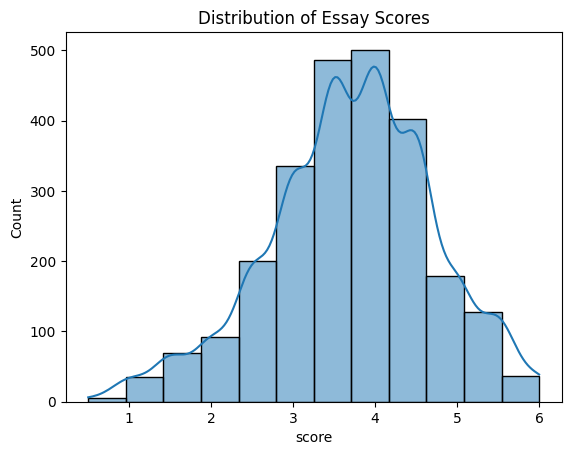

In [29]:
# Understand distribution of scores

import seaborn as sns
import matplotlib.pyplot as plt

print(df_train_full['score'].unique()) #adjusted bins to 12 due to having only 12 unique scores so makes the representation clearer and the trend more obvious
sns.histplot(df_train_full["score"], bins=12, kde=True)
plt.title("Distribution of Essay Scores")
plt.show() 

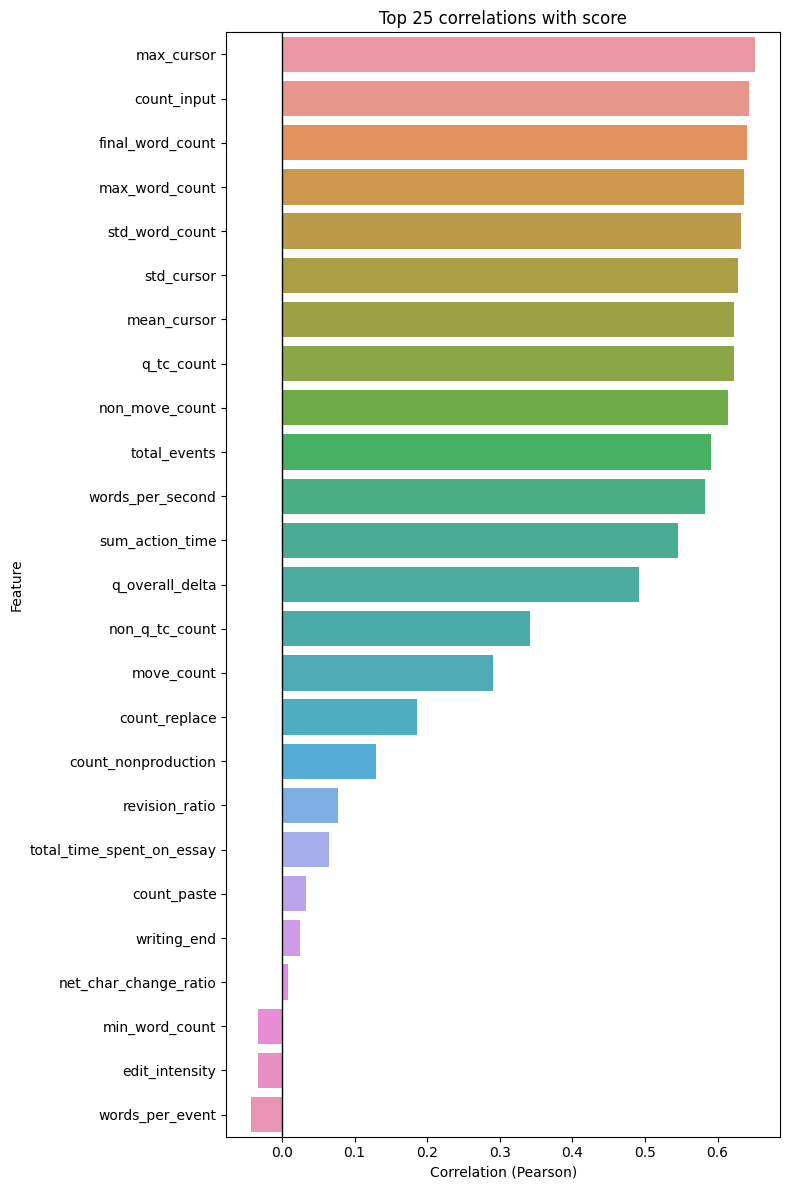

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Compute correlations only on numeric columns
corr_series = (
    df_train_full
      .drop(columns=['id'])                 # id isn’t a feature
      .corr(numeric_only=True)['score']     # get correlations w.r.t. score
      .drop('score', errors='ignore')       # remove self-correlation
      .dropna()                             # drop NaNs to avoid warnings
      .sort_values(ascending=False)
)

# 2) Put into a tidy DataFrame for seaborn
corr_df = corr_series.reset_index()
corr_df.columns = ['feature', 'corr']

# (Optional) take top-N features to keep the plot readable
topN = 25
corr_df = corr_df.head(topN)

# 3) Plot cleanly
plt.figure(figsize=(8, 0.4*len(corr_df)+2))
sns.barplot(data=corr_df, x='corr', y='feature', orient='h')
plt.axvline(0, color='k', linewidth=1)
plt.title(f'Top {len(corr_df)} correlations with score')
plt.xlabel('Correlation (Pearson)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


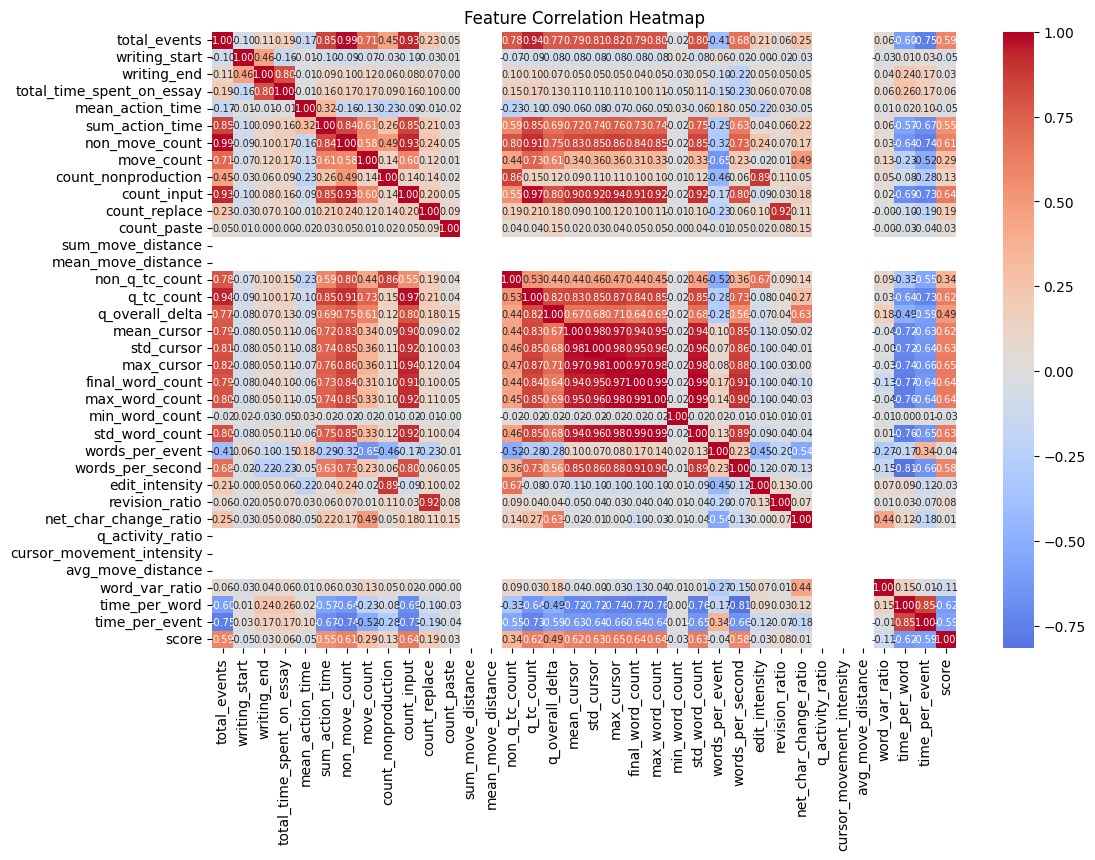

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(
    df_train_full.corr(numeric_only=True),
    cmap="coolwarm",
    center=0,
    annot=True,       # show nuvalues
    fmt=".2f",        # round to 2 decimals
    annot_kws={"size":7}  # smaller font size
)
plt.title("Feature Correlation Heatmap")
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


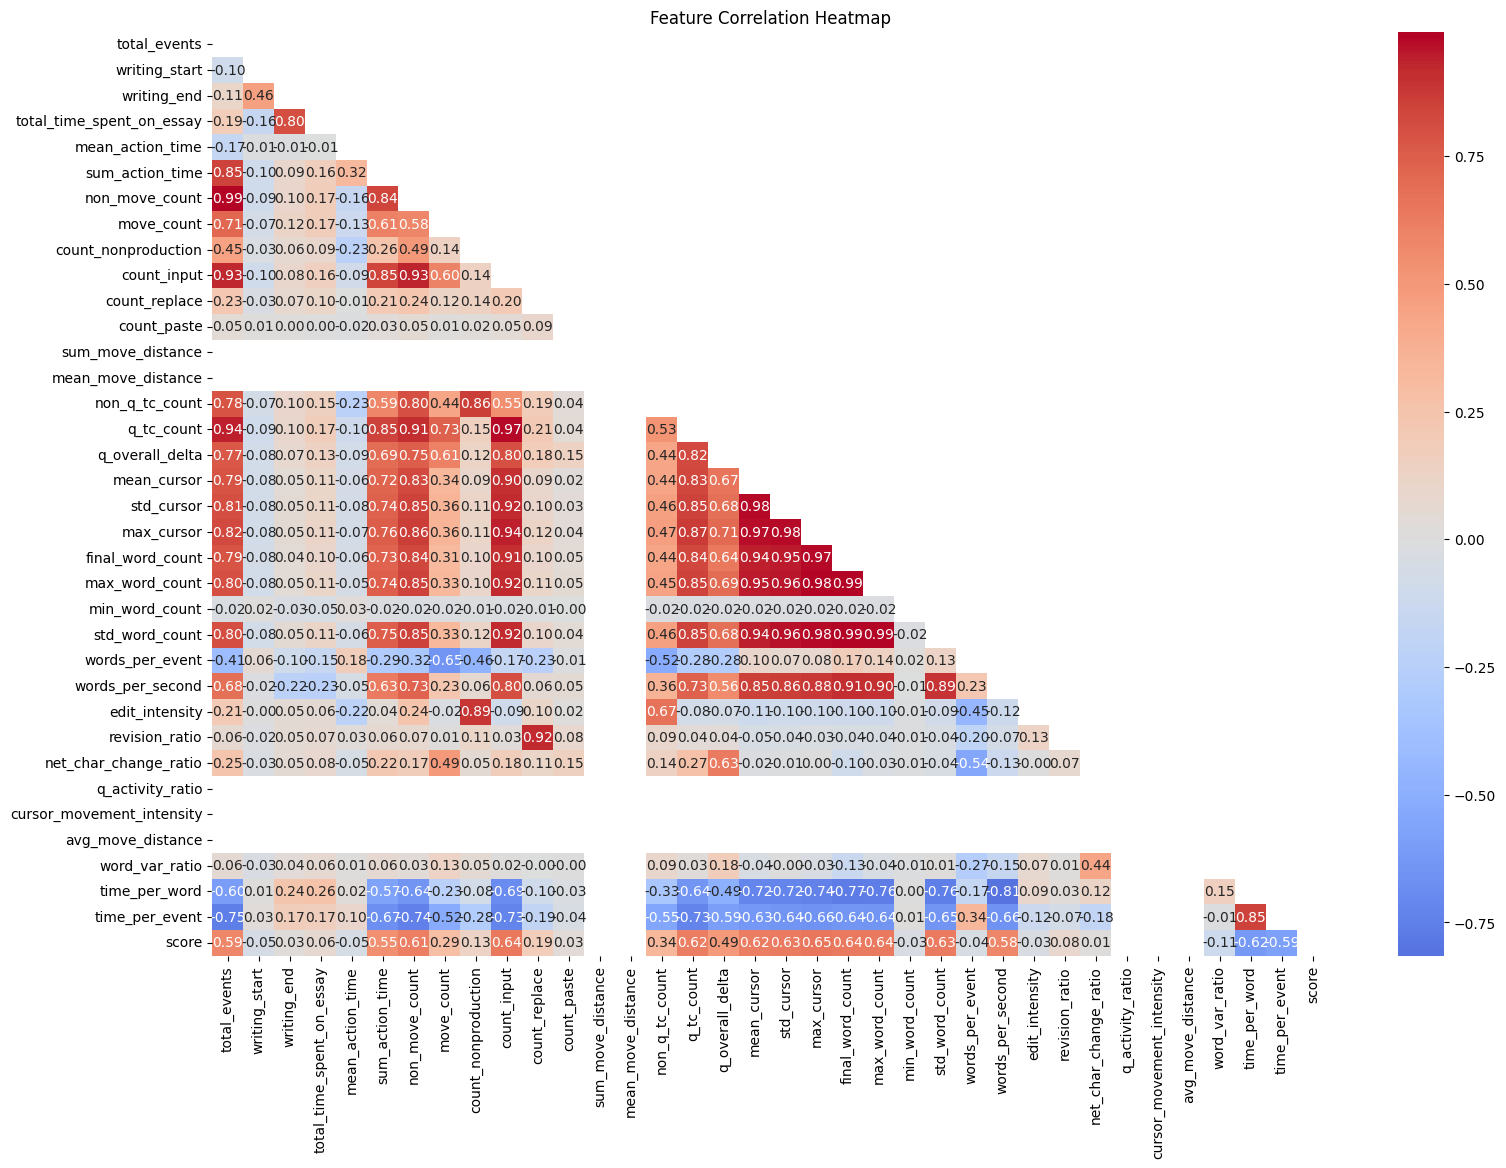

In [32]:
plt.figure(figsize=(18,12))
corr_matrix = df_train_full.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap="coolwarm",
    center=0,
    annot=True, #show numerical values
    fmt=".2f" #round to 2decimal places
)
plt.title("Feature Correlation Heatmap")
plt.show()

#cant decide which map looks easier to read so i have left both of them (maybe next meeting can discuss or something)

In [33]:
''' Things to do

Cleaning/Aggregating
1. Sentence restructuring, sentence length, duration of typing each sentence, number of words between each comma
2. Coming up with creative metrics that may be highly correlated with the score
3. See if there are other tools to help us find the correlation between our columns and the score
4. Research on metrics that may be helpful (if can, put link in the document and description)
5. Discarded all inputs in first 10 mins (what the best model did)

Model Training
1. Apply models we learn in sch (decision tree, linear regression, naive-bayes, random forest, kNN)
2. Understand how the LightGBM/XGBoost/CatBoost works?


kobe is washed NAH

'''


' Things to do\n\nCleaning/Aggregating\n1. Sentence restructuring, sentence length, duration of typing each sentence, number of words between each comma\n2. Coming up with creative metrics that may be highly correlated with the score\n3. See if there are other tools to help us find the correlation between our columns and the score\n4. Research on metrics that may be helpful (if can, put link in the document and description)\n5. Discarded all inputs in first 10 mins (what the best model did)\n\nModel Training\n1. Apply models we learn in sch (decision tree, linear regression, naive-bayes, random forest, kNN)\n2. Understand how the LightGBM/XGBoost/CatBoost works?\n\n\nkobe is washed NAH\n\n'

In [34]:
df_train_logs_original[df_train_logs_original['down_event'] == 'Shift']
df_test_logs[df_test_logs['down_event'] == 'Shift']

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count,activity_trf,down_event_trf,up_event_trf,text_change_trf


## 2.7 Reconstructing essay




In [35]:
def getEssays(df):
    # Copy required columns
    textInputDf = df_train_logs_original[['id', 'activity', 'cursor_position', 'text_change']].copy()

    # Get rid of text inputs that dont add or remove any text
    # Note: Shift was unpredictable so we ignored it, due to similar up and downtimes
    textInputDf = textInputDf[textInputDf.activity != 'Nonproduction']

    # Get how much each Id there is, aka how many rows of text input we have to go through, and ranks them in the order in which we see them in the original dataframe
    valCountsArr = textInputDf['id'].value_counts(sort=False).values

    # Holds the final index of the previous Id, basically demarcates where one essay ends and another essay starts
    lastIndex = 0

    # Holds all the essays that have been reconstructed
    essaySeries = pd.Series()

    # Fills essay series with essays, #enumerate function acts as the counter for each essay to iterate through the rows
    for index, valCount in enumerate(valCountsArr):

        # Indexes down_time at current Id, indexes through the rows of the current essay
        currTextInput = textInputDf[['activity', 'cursor_position', 'text_change']].iloc[lastIndex : lastIndex + valCount]

        # Update the last index to jump to the next essay
        lastIndex += valCount

        # Where the essay content will be stored
        essayText = ""


        # Produces the essay by iterating through the input rows in the current essay
        for Input in currTextInput.values:

            # Input[0] = activity
            # Input[1] = cursor_position
            # Input[2] = text_change

            # If activity = Replace
            if Input[0] == 'Replace':
                # splits text_change at ' => '
                replaceTxt = Input[2].split(' => ')

                # DONT TOUCH
                essayText = essayText[:Input[1] - len(replaceTxt[1])] + replaceTxt[1] + essayText[Input[1] - len(replaceTxt[1]) + len(replaceTxt[0]):]
                continue


            # If activity = Paste
            if Input[0] == 'Paste':
                # DONT TOUCH
                essayText = essayText[:Input[1] - len(Input[2])] + Input[2] + essayText[Input[1] - len(Input[2]):]
                continue


            # If activity = Remove/Cut
            if Input[0] == 'Remove/Cut':
                # DONT TOUCH
                essayText = essayText[:Input[1]] + essayText[Input[1] + len(Input[2]):]
                continue


            # If activity = Move...
            if "M" in Input[0]:
                # Gets rid of the "Move from to" text
                croppedTxt = Input[0][10:]

                # Splits cropped text by ' To '
                splitTxt = croppedTxt.split(' To ')

                # Splits split text again by ', ' for each item
                valueArr = [item.split(', ') for item in splitTxt]

                # Move from [2, 4] To [5, 7] = (2, 4, 5, 7)
                moveData = (int(valueArr[0][0][1:]), int(valueArr[0][1][:-1]), int(valueArr[1][0][1:]), int(valueArr[1][1][:-1]))

                # Skip if someone manages to activiate this by moving to same place
                if moveData[0] != moveData[2]:
                    # Check if they move text forward in essay (they are different)
                    if moveData[0] < moveData[2]:
                        # DONT TOUCH
                        essayText = essayText[:moveData[0]] + essayText[moveData[1]:moveData[3]] + essayText[moveData[0]:moveData[1]] + essayText[moveData[3]:]
                    else:
                        # DONT TOUCH
                        essayText = essayText[:moveData[2]] + essayText[moveData[0]:moveData[1]] + essayText[moveData[2]:moveData[0]] + essayText[moveData[1]:]
                continue


            # If just input
            # Formula is basically the cursor position - the
            essayText = essayText[:Input[1] - len(Input[2])] + Input[2] + essayText[Input[1] - len(Input[2]):]
            #adds the original text from start until the cursor position - length of new word text +  inserts the new text + the cursor after the input to the end

        # Sets essay at index
        essaySeries[index] = essayText


    # Sets essay series index to the ids
    essaySeries.index =  textInputDf['id'].unique()


    # Returns the essay series
    return essaySeries

In [36]:
essays = getEssays(df_train_logs_original)
essaysTest = getEssays(df_test_logs)


In [37]:
print(essays.loc['001519c8'])


qqqqqqqqqqqqqqqqqqqqqqqqqqqqqqq.qnochannochangeqgenqqqoqqqqqqqqqqqqqqqqqqcqqqqqqqqhqqqqaqqqqqqqqqqnochangeqqqqqqqqqqqqqqqqqqqqqqqnochangenochangeqqqqqqnqqqoqqq qqqqq  =>qqqqqqqqq qq => qqqqqqqqqqqqqqqqqqqqqqqqqqnochangecqqqhqnochangeqqqq  => qqqqqqqqqqqqqqqqqqqqqqqqqqqq qqqqqq  => qqqqqqqqqqqqqqqqnonochanochangeqqqnochqnochannochangeqqqqnqqqoqqqchangeochangengeqannocnocnocnochan.nochangenochangegqqeqqq.hangehangehangnochangeegenoqqqqqqqcnochangehangnocnonochanochangengechangehanqqqqqqqoqcqhqaqnqgennochangenochangeochangenochangengnochanochangenocqqhqaqnqgengeeeqqqnnochangenochangeqnqoqcqhqaqngeqochanochannochangegennochnnochangeochangeangegeqqqnocnochangenochangehangenqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqnochangeqnochangeqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqnochangeqqqqqqqqqqnochangeqqqqqqqqqqqqqqqqqqqqqqqqqqqqq.qqqqqqqqqqqqqqqqqqqqqqqqqqqqqq,qqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqnochangeqqqqqqqqqnqqoqqqcqqqqqqqhqqqqqqqqaqqqqqqqnqqgqqqqeqqqqqqqqqqqqqqqqqqqqqq,qq

In [38]:
essay_df = essays.reset_index()
essay_df.columns = ['id', 'essay_text']

essayTest_df = essaysTest.reset_index()
essayTest_df.columns = ['id', 'essay_text']


In [39]:
import re
import numpy as np
import pandas as pd

def count_words(text):
    return len(re.findall(r'\b\w+\b', text)) #regex, find boundary of word then any letter, number or underscore then another boundary to dicatate end of word 

def count_sentences(text):
    sentences = re.split(r'[.!?]+', text) #regex, split sentences according to punctuation marks like ? ! and . 
    return len([s for s in sentences if s.strip()])

def count_paragraphs(text):
    paragraphs = text.split('\n')
    return len([p for p in paragraphs if p.strip()])

def sentence_length_stats(text):
    sentences = [s.strip() for s in re.split(r'[.!?]+', text) if s.strip()]
    lengths = [len(re.findall(r'\b\w+\b', s)) for s in sentences]
    if len(lengths) == 0:
        return pd.Series([0, 0, 0, 0, 0])
    mean_len = np.mean(lengths)
    std_len = np.std(lengths)
    cv = std_len / mean_len if mean_len > 0 else 0
    short_share = sum(l <= 5 for l in lengths) / len(lengths)
    long_share = sum(l >= 20 for l in lengths) / len(lengths)
    return pd.Series([mean_len, std_len, cv, short_share, long_share])

def paragraph_structure_stats(text):
    # Split into paragraphs
    paragraphs = [p.strip() for p in text.split('\n') if p.strip()]
    num_paras = len(paragraphs)
    if num_paras == 0:
        return pd.Series([0, 0, 0, 0, 0])

    # Sentence counts per paragraph
    sent_per_para = [len([s for s in re.split(r'[.!?]+', p) if s.strip()]) for p in paragraphs]
    avg_sent_per_para = np.mean(sent_per_para)
    var_sent_per_para = np.var(sent_per_para)

    # Word counts per paragraph
    para_word_counts = [len(re.findall(r'\b[a-zA-Z]+\b', p)) for p in paragraphs]

    # Intro/body/conclusion split
    intro_len = para_word_counts[0]
    conclusion_len = para_word_counts[-1] if num_paras > 1 else 0
    body_mean_len = np.mean(para_word_counts[1:-1]) if num_paras > 2 else 0

    return pd.Series([avg_sent_per_para, var_sent_per_para, intro_len, body_mean_len, conclusion_len])

def comma_density_stats(text):
    sentences = [s.strip() for s in re.split(r'[.!?]+', text) if s.strip()]
    if len(sentences) == 0:
        return pd.Series([0, 0, 0])

    num_commas = text.count(',')
    num_words = len(re.findall(r'\b[a-zA-Z]+\b', text))
    commas_per_sentence = num_commas / len(sentences)
    commas_per_100_words = (num_commas / num_words * 100) if num_words > 0 else 0

    multi_clause_sent_share = sum(s.count(',') >= 2 for s in sentences) / len(sentences)

    return pd.Series([commas_per_sentence, commas_per_100_words, multi_clause_sent_share])




essay_df['num_words'] = essay_df['essay_text'].apply(count_words)
essay_df['num_sentences'] = essay_df['essay_text'].apply(count_sentences)
essay_df['num_paragraphs'] = essay_df['essay_text'].apply(count_paragraphs)

essay_df[['mean_sentence_len', 'std_sentence_len', 'cv_sentence_len',
           'short_sent_share', 'long_sent_share']] = \
    essay_df['essay_text'].apply(sentence_length_stats)

essay_df[['avg_sent_per_para', 'var_sent_per_para',
           'intro_para_len', 'body_para_mean_len', 'conclusion_para_len']] = \
    essay_df['essay_text'].apply(paragraph_structure_stats)

essay_df[['commas_per_sentence', 'commas_per_100_words', 'multi_clause_sent_share']] = \
    essay_df['essay_text'].apply(comma_density_stats)

essayTest_df['num_words'] = essayTest_df['essay_text'].apply(count_words)
essayTest_df['num_sentences'] = essayTest_df['essay_text'].apply(count_sentences)
essayTest_df['num_paragraphs'] = essayTest_df['essay_text'].apply(count_paragraphs)

essayTest_df[['mean_sentence_len', 'std_sentence_len', 'cv_sentence_len',
           'short_sent_share', 'long_sent_share']] = \
    essayTest_df['essay_text'].apply(sentence_length_stats)

essayTest_df[['avg_sent_per_para', 'var_sent_per_para',
           'intro_para_len', 'body_para_mean_len', 'conclusion_para_len']] = \
    essayTest_df['essay_text'].apply(paragraph_structure_stats)

essayTest_df[['commas_per_sentence', 'commas_per_100_words', 'multi_clause_sent_share']] = \
    essayTest_df['essay_text'].apply(comma_density_stats)


essay_df.columns.tolist()
essayTest_df.columns.tolist()

['id',
 'essay_text',
 'num_words',
 'num_sentences',
 'num_paragraphs',
 'mean_sentence_len',
 'std_sentence_len',
 'cv_sentence_len',
 'short_sent_share',
 'long_sent_share',
 'avg_sent_per_para',
 'var_sent_per_para',
 'intro_para_len',
 'body_para_mean_len',
 'conclusion_para_len',
 'commas_per_sentence',
 'commas_per_100_words',
 'multi_clause_sent_share']

In [40]:
import re
import pandas as pd
import math

def semicolon_colon_stats(text: str) -> pd.Series:
    # Sentence split identical to your function
    sentences = [s.strip() for s in re.split(r'[.!?]+', text) if s.strip()]
    n_sent = len(sentences)

    # "Tokens" = alphabetic words, matching your \b[a-zA-Z]+\b choice
    num_tokens = len(re.findall(r'\b[a-zA-Z]+\b', text))

    num_semicolons = text.count(';')
    num_colons     = text.count(':')

    per100 = lambda n: (n / num_tokens * 100.0) if num_tokens > 0 else 0.0
    sent_share = lambda ch: (sum(ch in s for s in sentences) / n_sent) if n_sent > 0 else 0.0

    return pd.Series(
        [
            per100(num_semicolons),
            per100(num_colons),
            sent_share(';'),
            sent_share(':')
        ],
        index=[
            'semicolons_per_100_tokens',
            'colons_per_100_tokens',
            'share_sents_with_semicolon',
            'share_sents_with_colon'
        ]
    )


def paren_quote_dash_stats(text: str) -> pd.Series:
    """
    Returns counts and a diversity index (Shannon entropy over punctuation types)
    for parentheses, quotation marks, and dashes. Same input style as your other
    functions (plain text string).

    Output columns:
      - parentheses_count
      - left_parentheses_count
      - right_parentheses_count
      - single_quotes_count
      - double_quotes_count
      - dashes_count
      - punct_diversity_shannon        (bits; over 4 types: parentheses, single quotes, double quotes, dashes)
      - punct_diversity_shannon_norm   (normalized to [0,1] by log2(4))
    """
    # Define character sets to count
    SINGLE_QUOTES = ["'", "‘", "’", "‚", "‛"]
    DOUBLE_QUOTES = ['"', "“", "”", "„", "‟"]
    DASHES        = ["-", "–", "—"]  # hyphen, en dash, em dash

    left_paren  = text.count("(")
    right_paren = text.count(")")
    parentheses = left_paren + right_paren

    single_q = sum(text.count(ch) for ch in SINGLE_QUOTES)
    double_q = sum(text.count(ch) for ch in DOUBLE_QUOTES)
    dashes   = sum(text.count(ch) for ch in DASHES)

    # Shannon entropy over the 4 *types*: (parentheses, single_q, double_q, dashes)
    counts = [parentheses, single_q, double_q, dashes]
    total  = sum(counts)
    if total > 0:
        p = [c / total for c in counts if c > 0]
        H = -sum(pi * math.log(pi, 2) for pi in p)  # bits
        H_norm = H / math.log(4, 2)                 # normalize by log2(#types=4) -> [0,1]
    else:
        H = 0.0
        H_norm = 0.0

    return pd.Series(
        [
            parentheses,
            left_paren,
            right_paren,
            single_q,
            double_q,
            dashes,
            H,
            H_norm
        ],
        index=[
            "parentheses_count",
            "left_parentheses_count",
            "right_parentheses_count",
            "single_quotes_count",
            "double_quotes_count",
            "dashes_count",
            "punct_diversity_shannon",
            "punct_diversity_shannon_norm"
        ]
    )


def mechanics_consistency_stats(text: str) -> pd.Series:
    """
    Mechanics consistency features from masked essays (same input style as your other funcs).

    Returns a Series with:
      - Mismatched parentheses (open/close/total)
      - Mismatched quotes (straight & curly; totals)
      - Repeated punctuation sequences (e.g., ",,", "..", "!!", "??", "--") by type and total
      - Spacing anomalies: spaces before punctuation, spaces before comma (subset),
        double spaces after end-of-sentence punctuation
      - Normalized rates (per 100 tokens; per 100 sentences for double-space-after-EOS)
    """
    # Sentences and tokens (match your existing conventions)
    sentences = [s.strip() for s in re.split(r'[.!?]+', text) if s.strip()]
    n_sent = len(sentences)
    n_tokens = len(re.findall(r'\b[a-zA-Z]+\b', text))
    per100_tokens = (lambda n: (n / n_tokens * 100.0) if n_tokens > 0 else 0.0)
    per100_sents  = (lambda n: (n / n_sent   * 100.0) if n_sent   > 0 else 0.0)

    # -------------------------------
    # 1) Mismatched parentheses
    # -------------------------------
    unmatched_open = 0
    stack = 0
    for ch in text:
        if ch == '(':
            stack += 1
        elif ch == ')':
            if stack > 0:
                stack -= 1
            else:
                unmatched_open += 0  # no effect here; count unmatched close separately
    unmatched_close = 0
    stack2 = 0
    for ch in text:
        if ch == '(':
            stack2 += 1
        elif ch == ')':
            if stack2 > 0:
                stack2 -= 1
            else:
                unmatched_close += 1
    unmatched_open = stack2  # whatever left open after full scan

    mismatched_parens_total = unmatched_open + unmatched_close

    # -------------------------------
    # 2) Mismatched quotes
    #    - Straight single/double: count mod 2 (after removing apostrophes)
    #    - Curly pairs: abs(left - right)
    # -------------------------------
    # Remove apostrophes inside words so they don't count as standalone quotes
    text_no_apostrophes = re.sub(r'(?<=\w)[\'’](?=\w)', '', text)

    # Straight quotes
    straight_single = text_no_apostrophes.count("'")
    straight_double = text_no_apostrophes.count('"')
    unmatched_straight_single = straight_single % 2
    unmatched_straight_double = straight_double % 2

    # Curly quotes
    left_single  = text_no_apostrophes.count('‘')
    right_single = text_no_apostrophes.count('’')
    left_double  = text_no_apostrophes.count('“')
    right_double = text_no_apostrophes.count('”')

    mismatched_curly_single = abs(left_single - right_single)
    mismatched_curly_double = abs(left_double - right_double)

    mismatched_quotes_total = (
        unmatched_straight_single +
        unmatched_straight_double +
        mismatched_curly_single +
        mismatched_curly_double
    )

    # -------------------------------
    # 3) Repeated punctuation sequences
    #    e.g., ",,", "..", "!!", "??", "--"
    # -------------------------------
    def count_repeats(ch: str) -> int:
        # Count sequences of the same character length >= 2
        return len(re.findall(re.escape(ch) + r'{2,}', text))

    repeated_commas   = count_repeats(',')
    repeated_periods  = len(re.findall(r'\.{2,}', text))  # handle ellipses/.. as one category
    repeated_semis    = count_repeats(';')
    repeated_colons   = count_repeats(':')
    repeated_qmarks   = count_repeats(r'?')
    repeated_exclaims = count_repeats('!')
    # Dashes: handle hyphen, en dash, em dash separately, then sum
    repeated_hyphens  = count_repeats('-')
    repeated_endash   = count_repeats('–')
    repeated_emdash   = count_repeats('—')
    repeated_dashes   = repeated_hyphens + repeated_endash + repeated_emdash

    repeated_punct_total = (
        repeated_commas + repeated_periods + repeated_semis + repeated_colons +
        repeated_qmarks + repeated_exclaims + repeated_dashes
    )
    repeated_punct_per100 = per100_tokens(repeated_punct_total)

    # -------------------------------
    # 4) Spacing anomalies
    #    - space before comma (specific)
    #    - space before punctuation (aggregate)
    #    - double spaces after end-of-sentence punctuation
    # -------------------------------
    spaces_before_comma = len(re.findall(r'\s+,', text))
    spaces_before_punct_total = len(re.findall(r'\s+[,\.;:\?\!)]', text))
    spaces_before_punct_per100 = per100_tokens(spaces_before_punct_total)

    double_spaces_after_eos = len(re.findall(r'[.!?]\s{2,}', text))
    double_spaces_after_eos_per100s = per100_sents(double_spaces_after_eos)

    return pd.Series(
        [
            # Parens
            unmatched_open,
            unmatched_close,
            mismatched_parens_total,
            # Quotes
            unmatched_straight_single,
            unmatched_straight_double,
            mismatched_curly_single,
            mismatched_curly_double,
            mismatched_quotes_total,
            # Repeated punctuation
            repeated_commas,
            repeated_periods,
            repeated_semis,
            repeated_colons,
            repeated_qmarks,
            repeated_exclaims,
            repeated_dashes,
            repeated_punct_total,
            repeated_punct_per100,
            # Spacing anomalies
            spaces_before_comma,
            spaces_before_punct_total,
            spaces_before_punct_per100,
            double_spaces_after_eos,
            double_spaces_after_eos_per100s,
        ],
        index=[
            # Parens
            'unmatched_parens_open',
            'unmatched_parens_close',
            'mismatched_parens_total',
            # Quotes
            'unmatched_quotes_straight_single',
            'unmatched_quotes_straight_double',
            'mismatched_quotes_curly_single',
            'mismatched_quotes_curly_double',
            'mismatched_quotes_total',
            # Repeated punctuation
            'repeated_commas_seq',
            'repeated_periods_seq',
            'repeated_semicolons_seq',
            'repeated_colons_seq',
            'repeated_qmarks_seq',
            'repeated_exclaims_seq',
            'repeated_dashes_seq',
            'repeated_punct_sequences_total',
            'repeated_punct_sequences_per_100_tokens',
            # Spacing anomalies
            'spaces_before_comma',
            'spaces_before_punct_total',
            'spaces_before_punct_per_100_tokens',
            'double_spaces_after_eos',
            'double_spaces_after_eos_per_100_sentences',
        ]
    )


def multi_clause_proxy(text: str) -> pd.Series:
    """
    Proportion of sentences that contain MULTIPLE internal punctuation marks
    from {comma, semicolon, colon}. Sentence split matches your other funcs.

    Returns:
      - multi_clause_proxy_share (>=2 internal marks across , ; :)
      - any_internal_punct_share (>=1 internal mark)            [aux]
      - avg_internal_punct_per_sentence                         [aux]
    """
    # Same sentence split convention
    sentences = [s.strip() for s in re.split(r'[.!?]+', text) if s.strip()]
    n_sent = len(sentences)
    if n_sent == 0:
        return pd.Series(
            [0.0, 0.0, 0.0],
            index=[
                'multi_clause_proxy_share',
                'any_internal_punct_share',
                'avg_internal_punct_per_sentence'
            ]
        )

    def internal_punct_count(s: str) -> int:
        return s.count(',') + s.count(';') + s.count(':')

    counts = [internal_punct_count(s) for s in sentences]

    share_ge2 = sum(c >= 2 for c in counts) / n_sent
    share_ge1 = sum(c >= 1 for c in counts) / n_sent
    avg_per_sent = sum(counts) / n_sent

    return pd.Series(
        [share_ge2, share_ge1, avg_per_sent],
        index=[
            'multi_clause_proxy_share',
            'any_internal_punct_share',
            'avg_internal_punct_per_sentence'
        ]
    )

def rhythm_variety_stats(text: str) -> pd.Series:
    """
    Rhythm/variety via moving-window coefficient of variation (CV) of sentence lengths.
    - Sentence split matches your other funcs: [.!?]+
    - Sentence length = # alphabetic tokens in the sentence (\\b[a-zA-Z]+\\b)

    Returns:
      - num_sentences
      - sent_len_tokens_mean
      - sent_len_tokens_std
      - sent_len_tokens_cv_global
      - sent_len_tokens_cv_mw_mean      (mean CV over sliding windows)
      - sent_len_tokens_cv_mw_median
      - sent_len_tokens_cv_mw_max
      - sent_len_tokens_cv_mw_std
    """
    # Same sentence split convention
    sentences = [s.strip() for s in re.split(r'[.!?]+', text) if s.strip()]
    n_sent = len(sentences)
    if n_sent == 0:
        return pd.Series(
            [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            index=[
                'num_sentences',
                'sent_len_tokens_mean',
                'sent_len_tokens_std',
                'sent_len_tokens_cv_global',
                'sent_len_tokens_cv_mw_mean',
                'sent_len_tokens_cv_mw_median',
                'sent_len_tokens_cv_mw_max',
                'sent_len_tokens_cv_mw_std'
            ]
        )

    # Sentence lengths in alphabetic tokens (consistent with your other functions)
    sent_lengths = [
        len(re.findall(r'\b[a-zA-Z]+\b', s)) for s in sentences
    ]
    arr = np.array(sent_lengths, dtype=float)

    # Global stats
    mean_len = float(arr.mean())
    std_len  = float(arr.std(ddof=0))
    cv_global = float(std_len / mean_len) if mean_len > 0 else 0.0

    # Moving-window CV with fixed window size (no extra args to keep "same input")
    WINDOW = 5
    if n_sent < WINDOW:
        # If too short, compute a single-window CV over whatever is available
        cvs = [cv_global]
    else:
        cvs = []
        for i in range(n_sent - WINDOW + 1):
            w = arr[i:i+WINDOW]
            m = float(w.mean())
            s = float(w.std(ddof=0))
            cvs.append((s / m) if m > 0 else 0.0)

    cvs_arr = np.array(cvs, dtype=float)
    mw_mean   = float(cvs_arr.mean())   if cvs_arr.size else 0.0
    mw_median = float(np.median(cvs_arr)) if cvs_arr.size else 0.0
    mw_max    = float(cvs_arr.max())    if cvs_arr.size else 0.0
    mw_std    = float(cvs_arr.std(ddof=0)) if cvs_arr.size else 0.0

    return pd.Series(
        [
            n_sent,
            mean_len,
            std_len,
            cv_global,
            mw_mean,
            mw_median,
            mw_max,
            mw_std
        ],
        index=[
            'num_sentences',
            'sent_len_tokens_mean',
            'sent_len_tokens_std',
            'sent_len_tokens_cv_global',
            'sent_len_tokens_cv_mw_mean',
            'sent_len_tokens_cv_mw_median',
            'sent_len_tokens_cv_mw_max',
            'sent_len_tokens_cv_mw_std'
        ]
    )


def local_continuity_segmentation_stats(text: str) -> pd.Series:
    """
    Local continuity via segmentation:
      - Ratio of single-sentence paragraphs
      - Frequency of very short “bridge” sentences (<= THRESH tokens)
      - Position of punctuation-heavy sentences (commas/semicolon/colon)

    Sentence split and token definition match your other funcs:
      - Sentences: split on [.!?]+
      - Tokens:    alphabetic words via \\b[a-zA-Z]+\\b

    Returns a Series with:
      - num_paragraphs
      - single_sentence_paragraph_ratio
      - num_sentences
      - bridge_tokens_threshold
      - bridge_sentence_share
      - bridge_sentences_per_100_sentences
      - heavy_internal_punct_sentence_share
      - heavy_at_paragraph_edges_share
      - heavy_sentence_mean_normalized_position
      - semicolon_sentence_share
      - semicolon_at_paragraph_edges_share
      - colon_sentence_share
      - colon_at_paragraph_edges_share
    """
    # -----------------------
    # Paragraph splitting
    # -----------------------
    text_stripped = text.strip()
    # Split on blank lines; if none, treat whole text as one paragraph (if non-empty)
    paragraphs = [p.strip() for p in re.split(r'(?:\r?\n\s*\r?\n)+', text_stripped) if p.strip()]
    if not paragraphs and text_stripped:
        paragraphs = [text_stripped]
    n_par = len(paragraphs)

    # -----------------------
    # Sentence splitting per paragraph
    # -----------------------
    def split_sentences(t: str):
        return [s.strip() for s in re.split(r'[.!?]+', t) if s.strip()]

    para_sents = [split_sentences(p) for p in paragraphs]
    sentences = [s for ps in para_sents for s in ps]
    n_sent = len(sentences)

    # Helper: token count in a sentence (alphabetic "words")
    def tok_count(s: str) -> int:
        return len(re.findall(r'\b[a-zA-Z]+\b', s))

    # -----------------------
    # 1) Ratio of single-sentence paragraphs
    # -----------------------
    if n_par == 0:
        single_sent_par_ratio = 0.0
    else:
        single_sent_par_ratio = sum(1 for ps in para_sents if len(ps) == 1) / n_par

    # -----------------------
    # 2) Frequency of very short “bridge” sentences
    #    Threshold chosen to avoid extra args: <=5 tokens
    # -----------------------
    BRIDGE_TOK_THRESHOLD = 5
    if n_sent == 0:
        bridge_share = 0.0
        bridge_per100 = 0.0
    else:
        sent_lengths = [tok_count(s) for s in sentences]
        bridge_flags = [L <= BRIDGE_TOK_THRESHOLD for L in sent_lengths]
        bridge_share = sum(bridge_flags) / n_sent
        bridge_per100 = bridge_share * 100.0

    # -----------------------
    # 3) Punctuation-heavy sentences & their positions
    #    Heavy if: has ';' or ':' OR total (',' + ';' + ':') >= 2
    # -----------------------
    def internal_punct_count(s: str) -> int:
        return s.count(',') + s.count(';') + s.count(':')

    heavy_flags = [((';'
                      in s) or (':'
                                in s) or (internal_punct_count(s) >= 2)) for s in sentences]
    heavy_share = (sum(heavy_flags) / n_sent) if n_sent > 0 else 0.0

    # Map each sentence to (paragraph_idx, local_idx_in_par, par_len)
    sent_meta = []
    for p_idx, ps in enumerate(para_sents):
        par_len = len(ps)
        for i, _ in enumerate(ps):
            sent_meta.append((p_idx, i, par_len))

    # Heavy sentences at paragraph edges (first/last sentence of a paragraph)
    if heavy_flags:
        heavy_indices = [i for i, h in enumerate(heavy_flags) if h]
        heavy_edges = 0
        for gi in heavy_indices:
            _, local_i, par_len = sent_meta[gi]
            if par_len > 0 and (local_i == 0 or local_i == par_len - 1):
                heavy_edges += 1
        heavy_at_edges_share = (heavy_edges / len(heavy_indices)) if heavy_indices else 0.0
    else:
        heavy_at_edges_share = 0.0

    # Mean normalized position (0=start, 1=end) of heavy sentences in the whole essay
    if n_sent > 1 and heavy_flags:
        heavy_positions = [i / (n_sent - 1) for i, h in enumerate(heavy_flags) if h]
        heavy_pos_mean = float(np.mean(heavy_positions)) if heavy_positions else 0.0
    else:
        heavy_pos_mean = 0.0

    # -----------------------
    # (Optional, useful) Semicolon/colon sentences, and whether they sit at paragraph edges
    # -----------------------
    semi_flags = [';' in s for s in sentences]
    colon_flags = [':' in s for s in sentences]

    def edge_share_for_mask(mask):
        idxs = [i for i, f in enumerate(mask) if f]
        if not idxs:
            return 0.0
        edge_count = 0
        for gi in idxs:
            _, local_i, par_len = sent_meta[gi]
            if par_len > 0 and (local_i == 0 or local_i == par_len - 1):
                edge_count += 1
        return edge_count / len(idxs)

    semi_share_all = (sum(semi_flags) / n_sent) if n_sent > 0 else 0.0
    colon_share_all = (sum(colon_flags) / n_sent) if n_sent > 0 else 0.0
    semi_edge_share = edge_share_for_mask(semi_flags)
    colon_edge_share = edge_share_for_mask(colon_flags)

    return pd.Series(
        [
            n_par,
            single_sent_par_ratio,
            n_sent,
            BRIDGE_TOK_THRESHOLD,
            bridge_share,
            bridge_per100,
            heavy_share,
            heavy_at_edges_share,
            heavy_pos_mean,
            semi_share_all,
            semi_edge_share,
            colon_share_all,
            colon_edge_share,
        ],
        index=[
            "num_paragraphs",
            "single_sentence_paragraph_ratio",
            "num_sentences",
            "bridge_tokens_threshold",
            "bridge_sentence_share",
            "bridge_sentences_per_100_sentences",
            "heavy_internal_punct_sentence_share",
            "heavy_at_paragraph_edges_share",
            "heavy_sentence_mean_normalized_position",
            "semicolon_sentence_share",
            "semicolon_at_paragraph_edges_share",
            "colon_sentence_share",
            "colon_at_paragraph_edges_share",
        ],
    )

def list_explanation_pattern_stats(text: str) -> pd.Series:
    """
    List/explanation patterns:
      - Detect sentences that contain a colon and, AFTER the first colon,
        have multiple commas/semicolons (list/elaboration proxy).
      - Count list-like "items" after the colon by splitting on [,;] and
        requiring at least one alphabetic token per segment.

    Sentence split and token definition match your other funcs:
      - Sentences: [.!?]+
      - Tokens:    \\b[a-zA-Z]+\\b

    Returns:
      - num_sentences
      - colon_sentence_share
      - list_like_colon_sentence_share_all       (list-like over ALL sentences)
      - list_like_colon_sentence_share_among_colon
      - semicolon_in_tail_share_among_colon
      - avg_trailing_commas_semis_per_colon_sent
      - items_after_colon_mean
      - items_after_colon_median
      - items_after_colon_max
      - items_ge3_share_among_colon
    """
    sentences = [s.strip() for s in re.split(r'[.!?]+', text) if s.strip()]
    n_sent = len(sentences)

    if n_sent == 0:
        return pd.Series(
            [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
            index=[
                'num_sentences',
                'colon_sentence_share',
                'list_like_colon_sentence_share_all',
                'list_like_colon_sentence_share_among_colon',
                'semicolon_in_tail_share_among_colon',
                'avg_trailing_commas_semis_per_colon_sent',
                'items_after_colon_mean',
                'items_after_colon_median',
                'items_after_colon_max',
                'items_ge3_share_among_colon',
            ]
        )

    # Helpers
    def has_alpha_tokens(s: str) -> bool:
        return re.search(r'\b[a-zA-Z]+\b', s) is not None

    colon_flags = []
    list_like_flags = []
    semicolon_in_tail_flags = []
    trailing_punct_counts = []
    items_counts = []

    for s in sentences:
        if ':' not in s:
            colon_flags.append(False)
            continue

        colon_flags.append(True)
        head, tail = s.split(':', 1)

        # Count internal punctuation AFTER colon
        commas = tail.count(',')
        semis  = tail.count(';')
        total_internal = commas + semis
        trailing_punct_counts.append(total_internal)

        # Semicolon presence in tail (often used for lists with internal commas)
        semicolon_in_tail_flags.append(semis > 0)

        # List-like proxy: at least 2 internal marks after colon
        list_like_flags.append(total_internal >= 2)

        # Item count: split tail by comma/semicolon, keep segments with alphabetic tokens
        segments = [seg.strip() for seg in re.split(r'[;,]', tail)]
        items = [seg for seg in segments if has_alpha_tokens(seg)]
        items_counts.append(len(items))

    n_colon = sum(colon_flags)
    colon_share = n_colon / n_sent

    list_like_total = sum(list_like_flags) if list_like_flags else 0
    list_like_share_all = list_like_total / n_sent
    list_like_share_among_colon = (list_like_total / n_colon) if n_colon > 0 else 0.0

    semi_tail_share = (
        sum(semicolon_in_tail_flags) / n_colon
        if n_colon > 0 and semicolon_in_tail_flags else 0.0
    )

    avg_trailing_punct = (
        float(np.mean(trailing_punct_counts)) if trailing_punct_counts else 0.0
    )

    items_mean   = float(np.mean(items_counts))   if items_counts else 0.0
    items_median = float(np.median(items_counts)) if items_counts else 0.0
    items_max    = float(np.max(items_counts))    if items_counts else 0.0
    items_ge3_share = (
        sum(c >= 3 for c in items_counts) / n_colon if n_colon > 0 and items_counts else 0.0
    )

    return pd.Series(
        [
            n_sent,
            colon_share,
            list_like_share_all,
            list_like_share_among_colon,
            semi_tail_share,
            avg_trailing_punct,
            items_mean,
            items_median,
            items_max,
            items_ge3_share
        ],
        index=[
            'num_sentences',
            'colon_sentence_share',
            'list_like_colon_sentence_share_all',
            'list_like_colon_sentence_share_among_colon',
            'semicolon_in_tail_share_among_colon',
            'avg_trailing_commas_semis_per_colon_sent',
            'items_after_colon_mean',
            'items_after_colon_median',
            'items_after_colon_max',
            'items_ge3_share_among_colon',
        ]
    )






essay_df[['semicolons_per_100_tokens', 'colons_per_100_tokens', 'share_sents_with_semicolon', 'share_sents_with_colon']] = \
    essay_df['essay_text'].apply(semicolon_colon_stats)

essay_df[['parentheses_count', 'left_parentheses_count', 'right_parentheses_count', 'single_quotes_count', 'double_quotes_count', 'dashes_count', 'punct_diversity_shannon', 'punct_diversity_shannon_norm', ]] = \
    essay_df['essay_text'].apply(paren_quote_dash_stats)

essay_df[['unmatched_parens_open',
            'unmatched_parens_close',
            'mismatched_parens_total',
            # Quotes
            'unmatched_quotes_straight_single',
            'unmatched_quotes_straight_double',
            'mismatched_quotes_curly_single',
            'mismatched_quotes_curly_double',
            'mismatched_quotes_total',
            # Repeated punctuation
            'repeated_commas_seq',
            'repeated_periods_seq',
            'repeated_semicolons_seq',
            'repeated_colons_seq',
            'repeated_qmarks_seq',
            'repeated_exclaims_seq',
            'repeated_dashes_seq',
            'repeated_punct_sequences_total',
            'repeated_punct_sequences_per_100_tokens',
            # Spacing anomalies
            'spaces_before_comma',
            'spaces_before_punct_total',
            'spaces_before_punct_per_100_tokens',
            'double_spaces_after_eos',
            'double_spaces_after_eos_per_100_sentences', ]] = \
    essay_df['essay_text'].apply(mechanics_consistency_stats)

essay_df[['multi_clause_proxy_share', 'any_internal_punct_share', 'avg_internal_punct_per_sentence',]] = \
    essay_df['essay_text'].apply(multi_clause_proxy)

essay_df[['num_sentences',
            'sent_len_tokens_mean',
            'sent_len_tokens_std',
            'sent_len_tokens_cv_global',
            'sent_len_tokens_cv_mw_mean',
            'sent_len_tokens_cv_mw_median',
            'sent_len_tokens_cv_mw_max',
            'sent_len_tokens_cv_mw_std',]] = \
    essay_df['essay_text'].apply(rhythm_variety_stats)

essay_df[["num_paragraphs",
            "single_sentence_paragraph_ratio",
            "num_sentences",
            "bridge_tokens_threshold",
            "bridge_sentence_share",
            "bridge_sentences_per_100_sentences",
            "heavy_internal_punct_sentence_share",
            "heavy_at_paragraph_edges_share",
            "heavy_sentence_mean_normalized_position",
            "semicolon_sentence_share",
            "semicolon_at_paragraph_edges_share",
            "colon_sentence_share",
            "colon_at_paragraph_edges_share",]] = \
    essay_df['essay_text'].apply(local_continuity_segmentation_stats)

essay_df[[ 'num_sentences',
            'colon_sentence_share',
            'list_like_colon_sentence_share_all',
            'list_like_colon_sentence_share_among_colon',
            'semicolon_in_tail_share_among_colon',
            'avg_trailing_commas_semis_per_colon_sent',
            'items_after_colon_mean',
            'items_after_colon_median',
            'items_after_colon_max',
            'items_ge3_share_among_colon',]] = \
    essay_df['essay_text'].apply(list_explanation_pattern_stats)






essayTest_df[['semicolons_per_100_tokens', 'colons_per_100_tokens', 'share_sents_with_semicolon', 'share_sents_with_colon']] = \
    essayTest_df['essay_text'].apply(semicolon_colon_stats)

essayTest_df[['parentheses_count', 'left_parentheses_count', 'right_parentheses_count', 'single_quotes_count', 'double_quotes_count', 'dashes_count', 'punct_diversity_shannon', 'punct_diversity_shannon_norm', ]] = \
    essayTest_df['essay_text'].apply(paren_quote_dash_stats)

essayTest_df[['unmatched_parens_open',
            'unmatched_parens_close',
            'mismatched_parens_total',
            # Quotes
            'unmatched_quotes_straight_single',
            'unmatched_quotes_straight_double',
            'mismatched_quotes_curly_single',
            'mismatched_quotes_curly_double',
            'mismatched_quotes_total',
            # Repeated punctuation
            'repeated_commas_seq',
            'repeated_periods_seq',
            'repeated_semicolons_seq',
            'repeated_colons_seq',
            'repeated_qmarks_seq',
            'repeated_exclaims_seq',
            'repeated_dashes_seq',
            'repeated_punct_sequences_total',
            'repeated_punct_sequences_per_100_tokens',
            # Spacing anomalies
            'spaces_before_comma',
            'spaces_before_punct_total',
            'spaces_before_punct_per_100_tokens',
            'double_spaces_after_eos',
            'double_spaces_after_eos_per_100_sentences', ]] = \
    essayTest_df['essay_text'].apply(mechanics_consistency_stats)

essayTest_df[['multi_clause_proxy_share', 'any_internal_punct_share', 'avg_internal_punct_per_sentence',]] = \
    essayTest_df['essay_text'].apply(multi_clause_proxy)

essayTest_df[['num_sentences',
            'sent_len_tokens_mean',
            'sent_len_tokens_std',
            'sent_len_tokens_cv_global',
            'sent_len_tokens_cv_mw_mean',
            'sent_len_tokens_cv_mw_median',
            'sent_len_tokens_cv_mw_max',
            'sent_len_tokens_cv_mw_std',]] = \
    essayTest_df['essay_text'].apply(rhythm_variety_stats)

essayTest_df[["num_paragraphs",
            "single_sentence_paragraph_ratio",
            "num_sentences",
            "bridge_tokens_threshold",
            "bridge_sentence_share",
            "bridge_sentences_per_100_sentences",
            "heavy_internal_punct_sentence_share",
            "heavy_at_paragraph_edges_share",
            "heavy_sentence_mean_normalized_position",
            "semicolon_sentence_share",
            "semicolon_at_paragraph_edges_share",
            "colon_sentence_share",
            "colon_at_paragraph_edges_share",]] = \
    essayTest_df['essay_text'].apply(local_continuity_segmentation_stats)

essayTest_df[[ 'num_sentences',
            'colon_sentence_share',
            'list_like_colon_sentence_share_all',
            'list_like_colon_sentence_share_among_colon',
            'semicolon_in_tail_share_among_colon',
            'avg_trailing_commas_semis_per_colon_sent',
            'items_after_colon_mean',
            'items_after_colon_median',
            'items_after_colon_max',
            'items_ge3_share_among_colon',]] = \
    essayTest_df['essay_text'].apply(list_explanation_pattern_stats)

essay_df.columns.tolist()
essayTest_df.columns.tolist()

['id',
 'essay_text',
 'num_words',
 'num_sentences',
 'num_paragraphs',
 'mean_sentence_len',
 'std_sentence_len',
 'cv_sentence_len',
 'short_sent_share',
 'long_sent_share',
 'avg_sent_per_para',
 'var_sent_per_para',
 'intro_para_len',
 'body_para_mean_len',
 'conclusion_para_len',
 'commas_per_sentence',
 'commas_per_100_words',
 'multi_clause_sent_share',
 'semicolons_per_100_tokens',
 'colons_per_100_tokens',
 'share_sents_with_semicolon',
 'share_sents_with_colon',
 'parentheses_count',
 'left_parentheses_count',
 'right_parentheses_count',
 'single_quotes_count',
 'double_quotes_count',
 'dashes_count',
 'punct_diversity_shannon',
 'punct_diversity_shannon_norm',
 'unmatched_parens_open',
 'unmatched_parens_close',
 'mismatched_parens_total',
 'unmatched_quotes_straight_single',
 'unmatched_quotes_straight_double',
 'mismatched_quotes_curly_single',
 'mismatched_quotes_curly_double',
 'mismatched_quotes_total',
 'repeated_commas_seq',
 'repeated_periods_seq',
 'repeated_semico

## 2.8 Split into Kfolds for cross validation



In [41]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import inspect

# Robust RMSE helper (handles old/new sklearn)
def rmse_score(y_true, y_pred):
    if 'squared' in inspect.signature(mean_squared_error).parameters:
        return mean_squared_error(y_true, y_pred, squared=False)
    else:
        return np.sqrt(mean_squared_error(y_true, y_pred))



In [42]:
# --- Build X, y (aligned by id) ---
# Assumes essay_df has engineered features + an 'id' column
# and df_train_scores has ['id','score'] as in the Kaggle dataset.

# 1) Align by id
if 'id' in essay_df.columns and 'id' in df_train_scores.columns:
    X = essay_df.set_index('id')                     # use id as index (not a feature)
    y = df_train_scores.set_index('id').loc[X.index, 'score']
else:
    # Fallback if no id present — keep rows aligned by position
    X = essay_df.copy()
    y = df_train_scores['score'].iloc[:len(X)]

# 2) Keep only numeric feature columns (drop any stray objects)
X = X.select_dtypes(include=[np.number]).copy()

print(X.shape, y.shape)  # quick sanity check

# --- CV training (your code) ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []
models = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    print(f"\n🧩 Fold {fold}")
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = LGBMRegressor(
        objective='regression',
        learning_rate=0.05,
        num_leaves=31,
        feature_fraction=0.9,
        bagging_fraction=0.8,
        bagging_freq=5,
        n_estimators=1000,
        verbose=-1
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='rmse',
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=100)
        ]
    )

    preds = model.predict(X_val, num_iteration=model.best_iteration_)
    rmse = rmse_score(y_val, preds)
    rmse_scores.append(rmse)
    models.append(model)
    print(f"Fold {fold} RMSE: {rmse:.4f}")

print("\n✅ Average CV RMSE:", np.mean(rmse_scores))


(2471, 79) (2471,)

🧩 Fold 1
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 0.707612	valid_0's l2: 0.500715
Early stopping, best iteration is:
[56]	valid_0's rmse: 0.699186	valid_0's l2: 0.488862
Fold 1 RMSE: 0.6992

🧩 Fold 2
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 0.82876	valid_0's l2: 0.686843
Early stopping, best iteration is:
[50]	valid_0's rmse: 0.816115	valid_0's l2: 0.666044
Fold 2 RMSE: 0.8161

🧩 Fold 3
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[40]	valid_0's rmse: 0.772959	valid_0's l2: 0.597466
Fold 3 RMSE: 0.7730

🧩 Fold 4
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 0.774869	valid_0's l2: 0.600421
Early stopping, best iteration is:
[68]	valid_0's rmse: 0.77169	valid_0's l2: 0.595506
Fold 4 RMSE: 0.7717

🧩 Fold 5
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 0.740361	val

## 2.9 Residual Plots

In [43]:
'''import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

y_col = "score"
features = [
    'max_cursor', 'num_Input', 'final_word_count', 'max_word_count', 'std_word_count',
    'std_cursor', 'mean_cursor', 'tc_q_total', 'total_events', 'tc_total',
    'word_growth_rate', 'typing_speed', 'sum_action_time'
]

def residual_plots_linear(df, features, y_col="score", save_dir="/kaggle/working"):
    for f in features:
        # drop NaNs and constant columns
        sub = df[[f, y_col]].dropna()
        if sub[f].nunique() < 2:
            print(f"[skip] {f} has <2 unique values")
            continue

        X = sub[[f]].values
        y = sub[y_col].values

        # fit simple linear regression y ~ a + b*x
        lr = LinearRegression().fit(X, y)
        y_hat = lr.predict(X)
        resid = y - y_hat

        # ---- make the two-panel figure ----
        fig = plt.figure(figsize=(10,4))

        # (1) scatter with fitted line
        ax1 = fig.add_subplot(1,2,1)
        ax1.scatter(X[:,0], y, s=10)
        # line: sort by x so the line is not jagged
        order = np.argsort(X[:,0])
        ax1.plot(X[:,0][order], y_hat[order])
        ax1.set_title(f"{f} vs {y_col}\n(linear fit)")
        ax1.set_xlabel(f)
        ax1.set_ylabel(y_col)

        # (2) residuals vs x
        ax2 = fig.add_subplot(1,2,2)
        ax2.scatter(X[:,0], resid, s=10)
        ax2.axhline(0, linestyle="--")
        ax2.set_title(f"Residual plot: {f}")
        ax2.set_xlabel(f)
        ax2.set_ylabel("residual (y - ŷ)")

        fig.tight_layout()
        out = f"{save_dir}/residual_linear_{f}.png"
        plt.savefig(out, dpi=150, bbox_inches="tight")
        plt.close(fig)
        print(f"Saved {out}")

# run it on your aggregated training data
residual_plots_linear(df_train_with_scores, features)
'''

'import numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.linear_model import LinearRegression\n\ny_col = "score"\nfeatures = [\n    \'max_cursor\', \'num_Input\', \'final_word_count\', \'max_word_count\', \'std_word_count\',\n    \'std_cursor\', \'mean_cursor\', \'tc_q_total\', \'total_events\', \'tc_total\',\n    \'word_growth_rate\', \'typing_speed\', \'sum_action_time\'\n]\n\ndef residual_plots_linear(df, features, y_col="score", save_dir="/kaggle/working"):\n    for f in features:\n        # drop NaNs and constant columns\n        sub = df[[f, y_col]].dropna()\n        if sub[f].nunique() < 2:\n            print(f"[skip] {f} has <2 unique values")\n            continue\n\n        X = sub[[f]].values\n        y = sub[y_col].values\n\n        # fit simple linear regression y ~ a + b*x\n        lr = LinearRegression().fit(X, y)\n        y_hat = lr.predict(X)\n        resid = y - y_hat\n\n        # ---- make the two-panel figure ----\n        fig = plt.figure(figsize=(10,4))\

In [44]:
'''import numpy as np
from sklearn.model_selection import KFold

X = df_train_with_scores[features].values
y = df_train_with_scores['score'].values

kf = KFold(n_splits=5, shuffle=True, random_state=42)
oof = np.zeros(len(y))

models = []
for tr, va in kf.split(X):
    m = lgb.LGBMRegressor(
        objective='regression',
        learning_rate=0.05,
        num_leaves=31,
        feature_fraction=0.9,
        bagging_fraction=0.8,
        bagging_freq=5,
        n_estimators=1000,
        verbose=-1
    )
    m.fit(X[tr], y[tr],
          eval_set=[(X[va], y[va])],
          eval_metric='rmse',
          callbacks=[lgb.early_stopping(50), lgb.log_evaluation(100)])
    oof[va] = m.predict(X[va], num_iteration=m.best_iteration_)
    models.append(m)

resid = y - oof
df_resid = df_train_with_scores.copy()
df_resid["residual_lgb"] = resid

# one residual plot per feature vs model residuals
import matplotlib.pyplot as plt
for f in features:
    x = df_resid[f].values
    mask = np.isfinite(x) & np.isfinite(df_resid["residual_lgb"].values)
    if np.sum(mask) < 2:
        continue
    plt.figure(figsize=(5,4))
    plt.scatter(x[mask], df_resid["residual_lgb"].values[mask], s=10)
    plt.axhline(0, linestyle="--")
    plt.title(f"LGBM residuals vs {f}")
    plt.xlabel(f)
    plt.ylabel("residual (y - ŷ)")
    out = f"/kaggle/working/residual_lgb_{f}.png"
    plt.savefig(out, dpi=150, bbox_inches="tight")
    plt.close()
    print(f"Saved {out}")
'''

'import numpy as np\nfrom sklearn.model_selection import KFold\n\nX = df_train_with_scores[features].values\ny = df_train_with_scores[\'score\'].values\n\nkf = KFold(n_splits=5, shuffle=True, random_state=42)\noof = np.zeros(len(y))\n\nmodels = []\nfor tr, va in kf.split(X):\n    m = lgb.LGBMRegressor(\n        objective=\'regression\',\n        learning_rate=0.05,\n        num_leaves=31,\n        feature_fraction=0.9,\n        bagging_fraction=0.8,\n        bagging_freq=5,\n        n_estimators=1000,\n        verbose=-1\n    )\n    m.fit(X[tr], y[tr],\n          eval_set=[(X[va], y[va])],\n          eval_metric=\'rmse\',\n          callbacks=[lgb.early_stopping(50), lgb.log_evaluation(100)])\n    oof[va] = m.predict(X[va], num_iteration=m.best_iteration_)\n    models.append(m)\n\nresid = y - oof\ndf_resid = df_train_with_scores.copy()\ndf_resid["residual_lgb"] = resid\n\n# one residual plot per feature vs model residuals\nimport matplotlib.pyplot as plt\nfor f in features:\n    x = df

In [45]:
# --- Build X_test from essayTest_df and align columns to training features ---
assert 'id' in essayTest_df.columns, "essayTest_df must contain an 'id' column"

# 1) index by id; keep only numeric features
X_test = essayTest_df.set_index('id').select_dtypes(include=[np.number]).copy()

# 2) get training feature order (prefer X from training; else read from the first model)
try:
    train_features = list(X.columns)  # from your training block
except NameError:
    # fall back to model feature names
    f = getattr(models[0], 'feature_name_', None)
    if f is None:
        f = models[0].booster_.feature_name()
    train_features = list(f)

# 3) add any missing cols as 0.0, drop extras, enforce order
missing = [c for c in train_features if c not in X_test.columns]
for c in missing:
    X_test[c] = 0.0
extra = [c for c in X_test.columns if c not in train_features]
if extra:
    X_test.drop(columns=extra, inplace=True)
X_test = X_test[train_features]

# 4) clean NaN/inf
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(0.0)

# --- Predict with fold ensemble ---
def _predict_with_best(m, X_):
    bi = getattr(m, 'best_iteration_', None)
    try:
        return m.predict(X_, num_iteration=bi)  # works if early_stopping used
    except TypeError:
        return m.predict(X_)

fold_preds = np.column_stack([_predict_with_best(m, X_test) for m in models])
test_preds = fold_preds.mean(axis=1)

# --- Build submission (id must be string) ---
submission = pd.DataFrame({
    "id": X_test.index.astype(str),
    "score": test_preds
})

# --- Sanity checks ---
assert submission["id"].nunique() == len(submission), "Duplicate IDs in submission."
assert np.isfinite(submission["score"]).all(), "Found NaN/inf in scores."
# Optional: clip if your target is bounded
# submission["score"] = submission["score"].clip(1.0, 6.0)

print(submission.head())
print("✅ submission shape:", submission.shape)

# --- Save for Kaggle grader ---
submission.to_csv("/kaggle/working/submission.csv", index=False)
print("💾 wrote /kaggle/working/submission.csv")


         id     score
0  001519c8  3.640906
1  0022f953  4.059045
2  0042269b  4.369028
3  0059420b  2.745197
4  0075873a  3.980939
✅ submission shape: (2471, 2)
💾 wrote /kaggle/working/submission.csv


# File Management Stuff, Ignore

In [46]:
'''
IGNORE THIS FILE MANAGEMENT
from pathlib import Path
import shutil

src = Path("/kaggle/working")
dst = src / "residual_images"
dst.mkdir(exist_ok=True)

patterns = ["residual_lgb_*.*", "residual_linear_*.*"]
allowed = {".png", ".jpg", ".jpeg", ".pdf", ".svg"}

moved = 0
for pat in patterns:
    for p in src.glob(pat):
        if p.is_file() and p.suffix.lower() in allowed:
            target = dst / p.name
            # avoid overwrite just in case
            if target.exists():
                i = 1
                while (dst / f"{p.stem}_{i}{p.suffix}").exists():
                    i += 1
                target = dst / f"{p.stem}_{i}{p.suffix}"
            shutil.move(str(p), str(target))
            moved += 1

print(f"Moved {moved} files to {dst}")
# quick check
print(sorted(x.name for x in dst.iterdir()))
'''

'\nIGNORE THIS FILE MANAGEMENT\nfrom pathlib import Path\nimport shutil\n\nsrc = Path("/kaggle/working")\ndst = src / "residual_images"\ndst.mkdir(exist_ok=True)\n\npatterns = ["residual_lgb_*.*", "residual_linear_*.*"]\nallowed = {".png", ".jpg", ".jpeg", ".pdf", ".svg"}\n\nmoved = 0\nfor pat in patterns:\n    for p in src.glob(pat):\n        if p.is_file() and p.suffix.lower() in allowed:\n            target = dst / p.name\n            # avoid overwrite just in case\n            if target.exists():\n                i = 1\n                while (dst / f"{p.stem}_{i}{p.suffix}").exists():\n                    i += 1\n                target = dst / f"{p.stem}_{i}{p.suffix}"\n            shutil.move(str(p), str(target))\n            moved += 1\n\nprint(f"Moved {moved} files to {dst}")\n# quick check\nprint(sorted(x.name for x in dst.iterdir()))\n'

In [47]:
'''
IGNORE THIS FILE MANAMGEMENT
from pathlib import Path
from zipfile import ZipFile, ZIP_DEFLATED
from IPython.display import FileLink, display

src = Path("/kaggle/working/residual_images")
zip_path = Path("/kaggle/working/residual_images.zip")
allowed = {".png", ".jpg", ".jpeg", ".pdf", ".svg"}

with ZipFile(zip_path, "w", compression=ZIP_DEFLATED) as zf:
    for p in src.iterdir():
        if p.is_file() and p.suffix.lower() in allowed:
            zf.write(p, arcname=p.name)  # store without the full path

print("Wrote:", zip_path)
display(FileLink(str(zip_path)))  # clickable link in the notebook
'''

'\nIGNORE THIS FILE MANAMGEMENT\nfrom pathlib import Path\nfrom zipfile import ZipFile, ZIP_DEFLATED\nfrom IPython.display import FileLink, display\n\nsrc = Path("/kaggle/working/residual_images")\nzip_path = Path("/kaggle/working/residual_images.zip")\nallowed = {".png", ".jpg", ".jpeg", ".pdf", ".svg"}\n\nwith ZipFile(zip_path, "w", compression=ZIP_DEFLATED) as zf:\n    for p in src.iterdir():\n        if p.is_file() and p.suffix.lower() in allowed:\n            zf.write(p, arcname=p.name)  # store without the full path\n\nprint("Wrote:", zip_path)\ndisplay(FileLink(str(zip_path)))  # clickable link in the notebook\n'